# Installation

https://github.com/theislab/scCODA

conda create -n sccoda python=3.8
pip install sccoda
pip install ipykernel

In [2]:
# Setup
import importlib
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import pickle as pkl
import matplotlib.pyplot as plt
import tensorflow as tf
tf.config.threading.set_intra_op_parallelism_threads(30)

from sccoda.util import comp_ana as mod
from sccoda.util import cell_composition_data as dat
from sccoda.util import data_visualization as viz

Matplotlib is building the font cache; this may take a moment.


https://sccoda.readthedocs.io/en/latest/getting_started.html

# Major annotation

## CTRL vs MSA

In [52]:
# Load data
cell_counts = pd.read_table("/work/02_data/other/sccoda_major_ctrl_msa.tsv", delimiter="\t")
cell_counts

,sample,Astrocytes,Microglia,Oligodendrocytes,PVMs,Pericytes/endothelial,Immune,OPCs,Inh. neurons,Exc. neurons,MSN,condition
0,CTRL_037,1106,438,5297,18,29,31,455,213,106,81,CTRL
1,CTRL_039,555,293,6314,38,92,47,306,109,176,162,CTRL
2,CTRL_09051,217,520,5207,41,34,29,135,202,11,178,CTRL
3,CTRL_09055,395,765,4110,84,49,122,249,458,224,632,CTRL
4,CTRL_09057,151,77,2690,6,2,11,90,17,0,14,CTRL
5,CTRL_09148,744,408,4399,77,68,21,213,490,25,1675,CTRL
6,CTRL_09155,107,153,2571,3,5,1,119,0,0,0,CTRL
7,CTRL_10055,236,31,427,1,54,5,482,33,0,14,CTRL
8,CTRL_1467,351,57,2835,7,27,13,251,38,0,31,CTRL
9,CTRL_652,334,35,2272,3,48,10,262,153,14,107,CTRL


In [53]:
# Convert data to anndata object
data_all = dat.from_pandas(cell_counts, covariate_columns=["sample", "condition"])
print(data_all)

AnnData object with n_obs × n_vars = 17 × 10
    obs: 'sample', 'condition'


<Axes: xlabel='Cell type', ylabel='Proportion'>

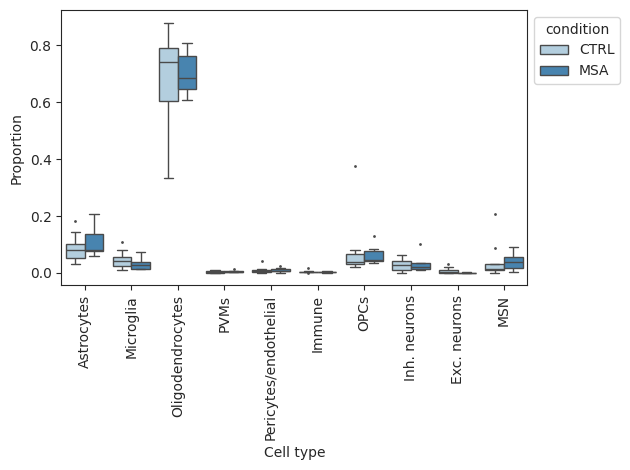

In [54]:
viz.boxplots(data_all, feature_name="condition")

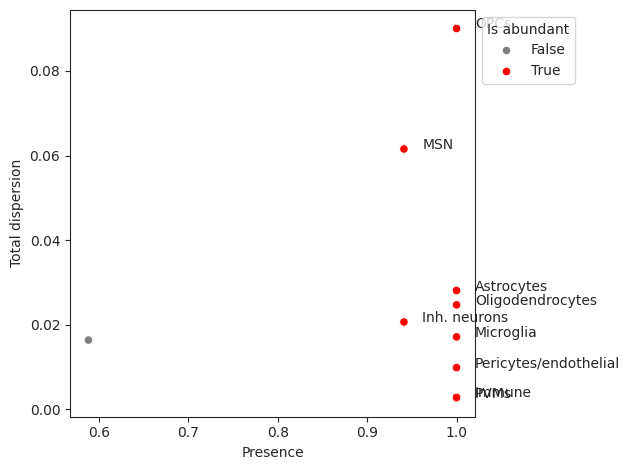

In [55]:
viz.rel_abundance_dispersion_plot(
    data=data_all,
    abundant_threshold=0.9
)
plt.show()

In [ ]:
model = mod.CompositionalAnalysis(data_all, formula="condition", reference_cell_type="PVMs")

In [ ]:
sim_results = model.sample_hmc()

In [136]:
sim_results.save("/work/02_data/scCODA/major_ctrl_msa")

### Load model

In [83]:
with open("/work/02_data/scCODA/major_ctrl_msa", "rb") as f:
    sim_results = pkl.load(f)

In [25]:
sim_results.summary()

Compositional Analysis summary:

Data: 17 samples, 10 cell types
Reference index: 3
Formula: condition

Intercepts:
                       Final Parameter  Expected Sample
Cell Type                                              
Astrocytes                       1.250       410.446653
Microglia                        0.514       196.614698
Oligodendrocytes                 3.245      3017.687127
PVMs                            -0.765        54.720913
Pericytes/endothelial           -0.492        71.897821
Immune                          -0.776        54.122282
OPCs                             0.874       281.813630
Inh. neurons                     0.103       130.352975
Exc. neurons                    -1.172        36.424658
MSN                              0.077       127.007478


Effects:
                                        Final Parameter  Expected Sample  \
Covariate        Cell Type                                                 
condition[T.MSA] Astrocytes                      

In [26]:
print(sim_results.credible_effects())

Covariate         Cell Type            
condition[T.MSA]  Astrocytes               False
                  Microglia                False
                  Oligodendrocytes         False
                  PVMs                     False
                  Pericytes/endothelial    False
                  Immune                   False
                  OPCs                     False
                  Inh. neurons             False
                  Exc. neurons             False
                  MSN                      False
Name: Final Parameter, dtype: bool


### Plot

In [84]:
sim_results.set_fdr(est_fdr=0.3)
sim_results.summary()

Compositional Analysis summary:

Data: 17 samples, 10 cell types
Reference index: 3
Formula: condition

Intercepts:
                       Final Parameter  Expected Sample
Cell Type                                              
Astrocytes                       1.250       410.446653
Microglia                        0.514       196.614698
Oligodendrocytes                 3.245      3017.687127
PVMs                            -0.765        54.720913
Pericytes/endothelial           -0.492        71.897821
Immune                          -0.776        54.122282
OPCs                             0.874       281.813630
Inh. neurons                     0.103       130.352975
Exc. neurons                    -1.172        36.424658
MSN                              0.077       127.007478


Effects:
                                        Final Parameter  Expected Sample  \
Covariate        Cell Type                                                 
condition[T.MSA] Astrocytes                      

In [85]:
print(sim_results.credible_effects())

Covariate         Cell Type            
condition[T.MSA]  Astrocytes               False
                  Microglia                False
                  Oligodendrocytes         False
                  PVMs                     False
                  Pericytes/endothelial    False
                  Immune                   False
                  OPCs                     False
                  Inh. neurons             False
                  Exc. neurons             False
                  MSN                      False
Name: Final Parameter, dtype: bool


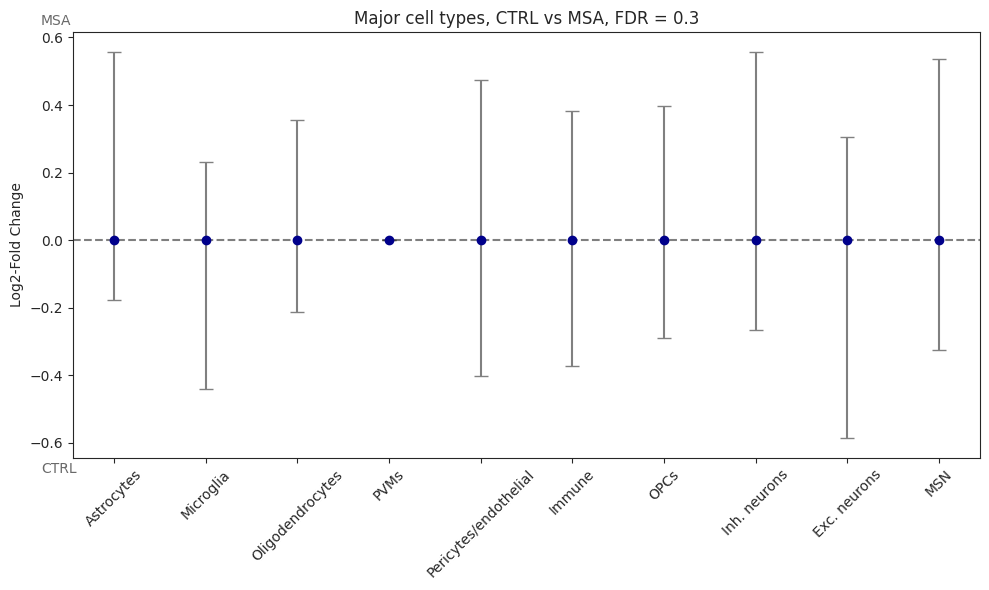

In [86]:
# Prepare DataFrame
df = sim_results.effect_df.reset_index()
df.rename(columns={"HDI 3%": "hdi_3", "HDI 97%": "hdi_97", "log2-fold change": "log2fc"}, inplace=True)

# Compute HDI errors
lower_err = (df["log2fc"] - df["hdi_3"]).abs()
upper_err = (df["hdi_97"] - df["log2fc"]).abs()

# Define highlight cells (optional)
highlight_cells = []  # customize as needed

plt.figure(figsize=(10, 6))
plt.errorbar(
    x=df["Cell Type"],
    y=df["log2fc"],
    yerr=[lower_err, upper_err],
    fmt='o',
    color='darkblue',
    ecolor='gray',
    capsize=5
)

# Horizontal reference line
plt.axhline(0, linestyle='--', color='black', alpha=0.5)

# Asterisks for selected cell types
for idx, row in df.iterrows():
    if row["Cell Type"] in highlight_cells:
        y_offset = upper_err[idx] + 0.01
        plt.text(
            x=idx,
            y=row["log2fc"] + y_offset,
            s="*",
            ha='center',
            va='bottom',
            fontsize=14,
            color='crimson'
        )

# Axis labels and ticks
plt.xticks(ticks=range(len(df["Cell Type"])), labels=df["Cell Type"], rotation=45)
plt.ylabel("Log2-Fold Change")
plt.xlabel("")

# Add overlay text near Y-axis to indicate condition direction
ylim = plt.ylim()
y_range = ylim[1] - ylim[0]
x_offset = -0.8  # nudges text outside the plot frame

plt.text(x=x_offset, y=ylim[1] + 0.01 * y_range, s="MSA", va='bottom', ha='left', fontsize=10, color='dimgray')
plt.text(x=x_offset, y=ylim[0] - 0.01 * y_range, s="CTRL", va='top', ha='left', fontsize=10, color='dimgray')

plt.title("Major cell types, CTRL vs MSA, FDR = 0.3")
plt.tight_layout()
plt.show()


## CTRL vs PD

In [9]:
# Load data
cell_counts = pd.read_table("/work/02_data/other/sccoda_major_ctrl_pd.tsv", delimiter="\t")
cell_counts

,sample,Astrocytes,Microglia,Oligodendrocytes,PVMs,Pericytes/endothelial,Immune,OPCs,Inh. neurons,Exc. neurons,MSN,condition
0,CTRL_037,1106,438,5297,18,29,31,455,213,106,81,CTRL
1,CTRL_039,555,293,6314,38,92,47,306,109,176,162,CTRL
2,CTRL_09051,217,520,5207,41,34,29,135,202,11,178,CTRL
3,CTRL_09055,395,765,4110,84,49,122,249,458,224,632,CTRL
4,CTRL_09057,151,77,2690,6,2,11,90,17,0,14,CTRL
5,CTRL_09148,744,408,4399,77,68,21,213,490,25,1675,CTRL
6,CTRL_09155,107,153,2571,3,5,1,119,0,0,0,CTRL
7,CTRL_10055,236,31,427,1,54,5,482,33,0,14,CTRL
8,CTRL_1467,351,57,2835,7,27,13,251,38,0,31,CTRL
9,CTRL_652,334,35,2272,3,48,10,262,153,14,107,CTRL


In [4]:
# Convert data to anndata object
data_all = dat.from_pandas(cell_counts, covariate_columns=["sample", "condition"])
print(data_all)

AnnData object with n_obs × n_vars = 22 × 10
    obs: 'sample', 'condition'


<Axes: xlabel='Cell type', ylabel='Proportion'>

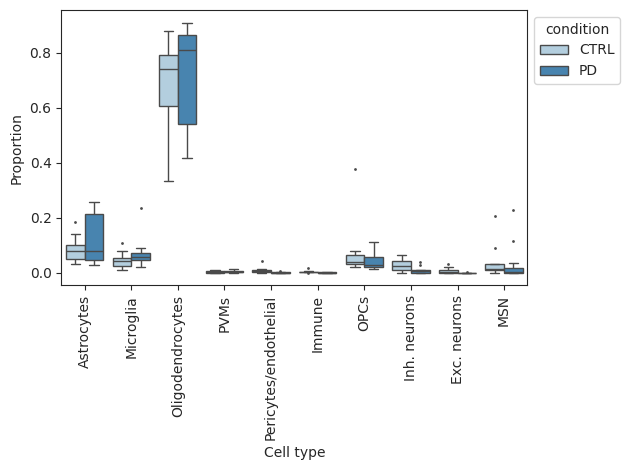

In [49]:
viz.boxplots(data_all, feature_name="condition")

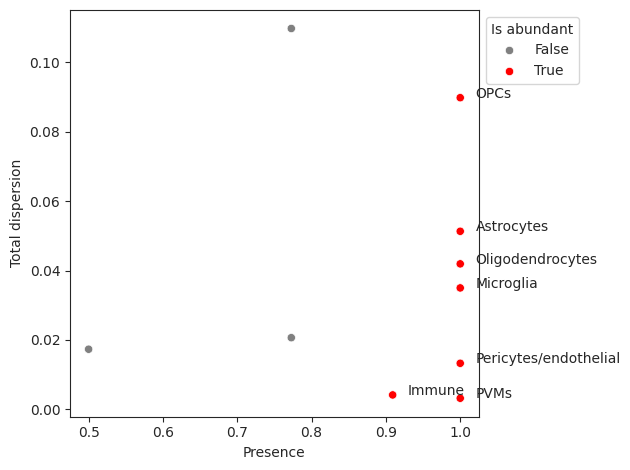

In [51]:
viz.rel_abundance_dispersion_plot(
    data=data_all,
    abundant_threshold=0.9
)
plt.show()

In [5]:
model = mod.CompositionalAnalysis(data_all, formula="condition", reference_cell_type="Pericytes/endothelial")

Zero counts encountered in data! Added a pseudocount of 0.5.


In [6]:
sim_results = model.sample_hmc()

100%|██████████| 20000/20000 [03:47<00:00, 87.76it/s]


MCMC sampling finished. (289.517 sec)
Acceptance rate: 90.3%


In [7]:
sim_results.save("/work/02_data/scCODA/major_ctrl_pd")

### Load model

In [87]:
with open("/work/02_data/scCODA/major_ctrl_pd", "rb") as f:
    sim_results = pkl.load(f)

In [28]:
sim_results.summary()

Compositional Analysis summary:

Data: 17 samples, 10 cell types
Reference index: 3
Formula: condition

Intercepts:
                       Final Parameter  Expected Sample
Cell Type                                              
Astrocytes                       1.250       410.446653
Microglia                        0.514       196.614698
Oligodendrocytes                 3.245      3017.687127
PVMs                            -0.765        54.720913
Pericytes/endothelial           -0.492        71.897821
Immune                          -0.776        54.122282
OPCs                             0.874       281.813630
Inh. neurons                     0.103       130.352975
Exc. neurons                    -1.172        36.424658
MSN                              0.077       127.007478


Effects:
                                        Final Parameter  Expected Sample  \
Covariate        Cell Type                                                 
condition[T.MSA] Astrocytes                      

In [29]:
print(sim_results.credible_effects())

Covariate         Cell Type            
condition[T.MSA]  Astrocytes               False
                  Microglia                False
                  Oligodendrocytes         False
                  PVMs                     False
                  Pericytes/endothelial    False
                  Immune                   False
                  OPCs                     False
                  Inh. neurons             False
                  Exc. neurons             False
                  MSN                      False
Name: Final Parameter, dtype: bool


### Plot

In [88]:
sim_results.set_fdr(est_fdr=0.3)
sim_results.summary()

Compositional Analysis summary:

Data: 22 samples, 10 cell types
Reference index: 4
Formula: condition

Intercepts:
                       Final Parameter  Expected Sample
Cell Type                                              
Astrocytes                       0.913       415.481214
Microglia                        0.457       263.337742
Oligodendrocytes                 2.871      2943.743645
PVMs                            -0.905        67.453428
Pericytes/endothelial           -0.966        63.461752
Immune                          -1.128        53.970489
OPCs                             0.443       259.676701
Inh. neurons                    -0.575        93.825568
Exc. neurons                    -1.366        42.539685
MSN                             -0.583        93.077958


Effects:
                                       Final Parameter  Expected Sample  \
Covariate       Cell Type                                                 
condition[T.PD] Astrocytes                         

In [89]:
print(sim_results.credible_effects())

Covariate        Cell Type            
condition[T.PD]  Astrocytes               False
                 Microglia                False
                 Oligodendrocytes         False
                 PVMs                     False
                 Pericytes/endothelial    False
                 Immune                   False
                 OPCs                     False
                 Inh. neurons             False
                 Exc. neurons             False
                 MSN                      False
Name: Final Parameter, dtype: bool


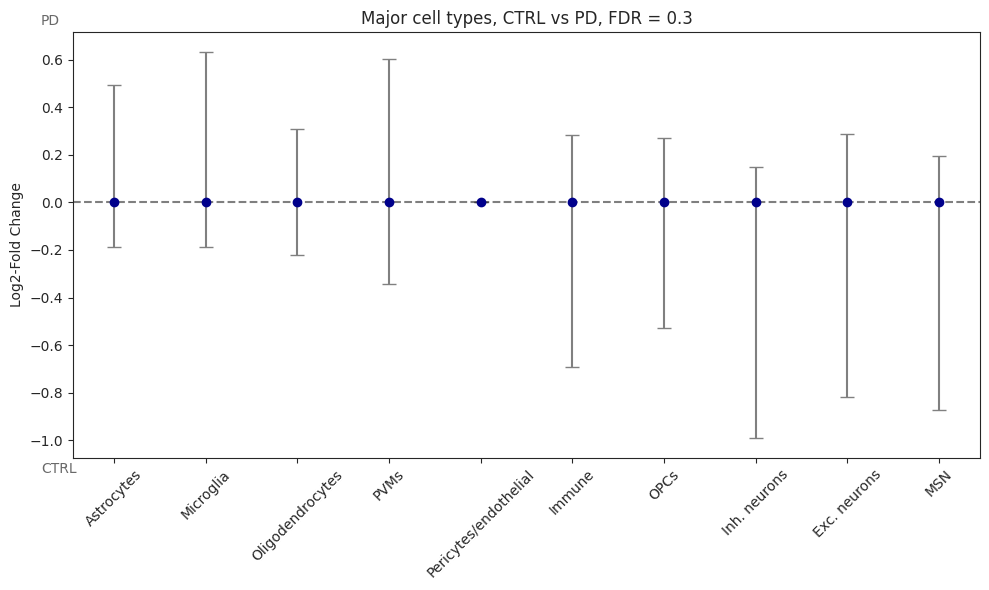

In [91]:
# Prepare DataFrame
df = sim_results.effect_df.reset_index()
df.rename(columns={"HDI 3%": "hdi_3", "HDI 97%": "hdi_97", "log2-fold change": "log2fc"}, inplace=True)

# Compute HDI errors
lower_err = (df["log2fc"] - df["hdi_3"]).abs()
upper_err = (df["hdi_97"] - df["log2fc"]).abs()

# Define highlight cells (optional)
highlight_cells = []  # customize as needed

plt.figure(figsize=(10, 6))
plt.errorbar(
    x=df["Cell Type"],
    y=df["log2fc"],
    yerr=[lower_err, upper_err],
    fmt='o',
    color='darkblue',
    ecolor='gray',
    capsize=5
)

# Horizontal reference line
plt.axhline(0, linestyle='--', color='black', alpha=0.5)

# Asterisks for selected cell types
for idx, row in df.iterrows():
    if row["Cell Type"] in highlight_cells:
        y_offset = upper_err[idx] + 0.01
        plt.text(
            x=idx,
            y=row["log2fc"] + y_offset,
            s="*",
            ha='center',
            va='bottom',
            fontsize=14,
            color='crimson'
        )

# Axis labels and ticks
plt.xticks(ticks=range(len(df["Cell Type"])), labels=df["Cell Type"], rotation=45)
plt.ylabel("Log2-Fold Change")
plt.xlabel("")

# Add overlay text near Y-axis to indicate condition direction
ylim = plt.ylim()
y_range = ylim[1] - ylim[0]
x_offset = -0.8  # nudges text outside the plot frame

plt.text(x=x_offset, y=ylim[1] + 0.01 * y_range, s="PD", va='bottom', ha='left', fontsize=10, color='dimgray')
plt.text(x=x_offset, y=ylim[0] - 0.01 * y_range, s="CTRL", va='top', ha='left', fontsize=10, color='dimgray')

plt.title("Major cell types, CTRL vs PD, FDR = 0.3")
plt.tight_layout()
plt.show()


## PD vs MSA

In [18]:
# Load data
cell_counts = pd.read_table("/work/02_data/other/sccoda_major_pd_msa.tsv", delimiter="\t")
cell_counts

,sample,Astrocytes,Microglia,Oligodendrocytes,PVMs,Pericytes/endothelial,Immune,OPCs,Inh. neurons,Exc. neurons,MSN,condition
0,MSA_1352,267,50,2206,8,4,2,149,324,5,203,MSA
1,MSA_1365,201,136,2716,20,23,16,136,40,2,72,MSA
2,MSA_1371,171,63,1733,6,13,6,184,38,0,4,MSA
3,MSA_1375,309,22,903,6,24,4,191,13,0,16,MSA
4,MSA_1391,576,44,1971,18,77,12,128,68,5,119,MSA
5,MSA_1398,279,254,2199,14,32,20,235,111,0,313,MSA
6,MSA_1436,449,228,4412,72,29,32,215,207,2,271,MSA
7,PD_6900,1088,205,2314,55,8,10,469,34,4,16,PD
8,PD_7044,590,668,1338,38,5,11,131,10,1,31,PD
9,PD_7050,180,185,2954,10,14,0,109,18,0,33,PD


In [19]:
# Convert data to anndata object
data_all = dat.from_pandas(cell_counts, covariate_columns=["sample", "condition"])
print(data_all)

AnnData object with n_obs × n_vars = 19 × 10
    obs: 'sample', 'condition'


<Axes: xlabel='Cell type', ylabel='Proportion'>

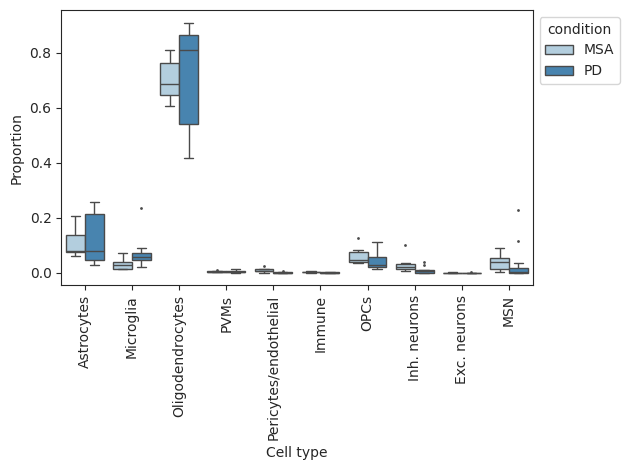

In [20]:
viz.boxplots(data_all, feature_name="condition")

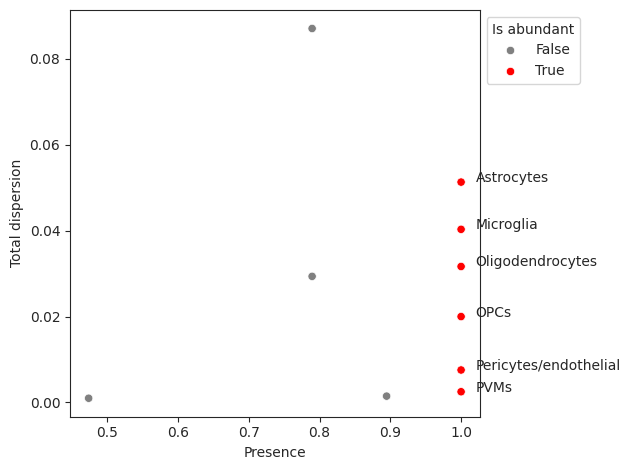

In [26]:
viz.rel_abundance_dispersion_plot(
    data=data_all,
    abundant_threshold=0.9
)
plt.show()

In [36]:
model = mod.CompositionalAnalysis(data_all, formula="condition", reference_cell_type="PVMs")

Zero counts encountered in data! Added a pseudocount of 0.5.


In [37]:
sim_results = model.sample_hmc()

100%|██████████| 20000/20000 [03:44<00:00, 89.20it/s]


MCMC sampling finished. (282.624 sec)
Acceptance rate: 71.1%


In [136]:
sim_results.save("/work/02_data/scCODA/major_pd_msa")

### Load model

In [92]:
with open("/work/02_data/scCODA/major_pd_msa", "rb") as f:
    sim_results = pkl.load(f)

In [35]:
sim_results.summary()

Compositional Analysis summary:

Data: 19 samples, 10 cell types
Reference index: 3
Formula: condition

Intercepts:
                       Final Parameter  Expected Sample
Cell Type                                              
Astrocytes                       1.285       355.694784
Microglia                        0.503       162.726848
Oligodendrocytes                 3.191      2392.449496
PVMs                            -0.698        48.963397
Pericytes/endothelial           -0.769        45.607538
Immune                          -1.063        33.990226
OPCs                             0.726       203.379362
Inh. neurons                    -0.101        88.949875
Exc. neurons                    -1.522        21.478942
MSN                             -0.099        89.127953


Effects:
                                       Final Parameter  Expected Sample  \
Covariate       Cell Type                                                 
condition[T.PD] Astrocytes                         

In [36]:
print(sim_results.credible_effects())

Covariate        Cell Type            
condition[T.PD]  Astrocytes               False
                 Microglia                False
                 Oligodendrocytes         False
                 PVMs                     False
                 Pericytes/endothelial    False
                 Immune                   False
                 OPCs                     False
                 Inh. neurons             False
                 Exc. neurons             False
                 MSN                      False
Name: Final Parameter, dtype: bool


### Plot

In [93]:
sim_results.set_fdr(est_fdr=0.3)
sim_results.summary()

Compositional Analysis summary:

Data: 19 samples, 10 cell types
Reference index: 3
Formula: condition

Intercepts:
                       Final Parameter  Expected Sample
Cell Type                                              
Astrocytes                       1.285       355.694784
Microglia                        0.503       162.726848
Oligodendrocytes                 3.191      2392.449496
PVMs                            -0.698        48.963397
Pericytes/endothelial           -0.769        45.607538
Immune                          -1.063        33.990226
OPCs                             0.726       203.379362
Inh. neurons                    -0.101        88.949875
Exc. neurons                    -1.522        21.478942
MSN                             -0.099        89.127953


Effects:
                                       Final Parameter  Expected Sample  \
Covariate       Cell Type                                                 
condition[T.PD] Astrocytes                    0.000

In [94]:
print(sim_results.credible_effects())

Covariate        Cell Type            
condition[T.PD]  Astrocytes               False
                 Microglia                 True
                 Oligodendrocytes         False
                 PVMs                     False
                 Pericytes/endothelial    False
                 Immune                   False
                 OPCs                     False
                 Inh. neurons              True
                 Exc. neurons             False
                 MSN                       True
Name: Final Parameter, dtype: bool


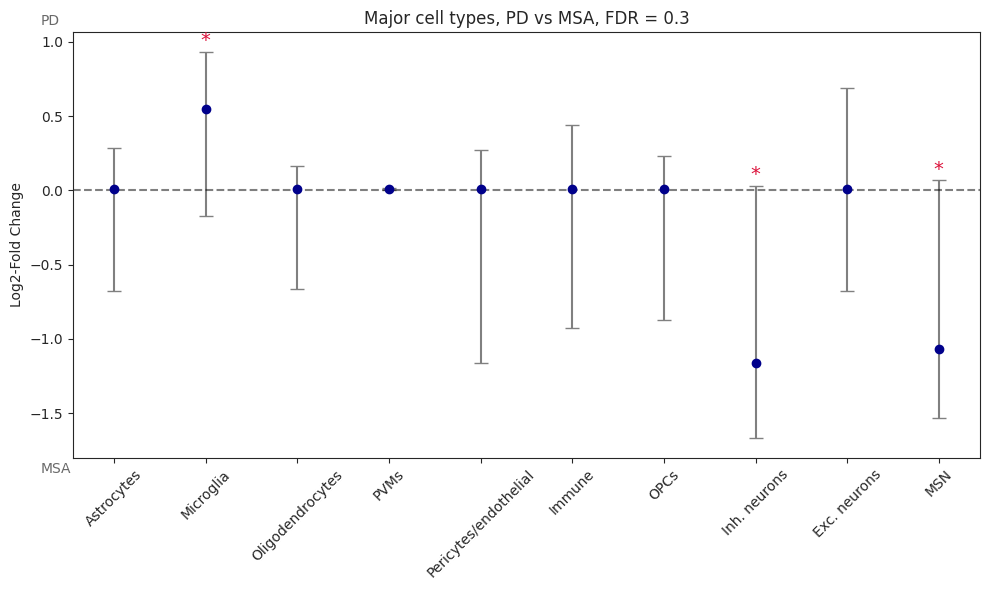

In [51]:
# Prepare DataFrame
df = sim_results.effect_df.reset_index()
df.rename(columns={"HDI 3%": "hdi_3", "HDI 97%": "hdi_97", "log2-fold change": "log2fc"}, inplace=True)

# Compute HDI errors
lower_err = (df["log2fc"] - df["hdi_3"]).abs()
upper_err = (df["hdi_97"] - df["log2fc"]).abs()

# Define highlight cells (optional)
highlight_cells = ["Inh. neurons", "MSN", "Microglia"]  # customize as needed

plt.figure(figsize=(10, 6))
plt.errorbar(
    x=df["Cell Type"],
    y=df["log2fc"],
    yerr=[lower_err, upper_err],
    fmt='o',
    color='darkblue',
    ecolor='gray',
    capsize=5
)

# Horizontal reference line
plt.axhline(0, linestyle='--', color='black', alpha=0.5)

# Asterisks for selected cell types
for idx, row in df.iterrows():
    if row["Cell Type"] in highlight_cells:
        y_offset = upper_err[idx] + 0.01
        plt.text(
            x=idx,
            y=row["log2fc"] + y_offset,
            s="*",
            ha='center',
            va='bottom',
            fontsize=14,
            color='crimson'
        )

# Axis labels and ticks
plt.xticks(ticks=range(len(df["Cell Type"])), labels=df["Cell Type"], rotation=45)
plt.ylabel("Log2-Fold Change")
plt.xlabel("")

# Add overlay text near Y-axis to indicate condition direction
ylim = plt.ylim()
y_range = ylim[1] - ylim[0]
x_offset = -0.8  # nudges text outside the plot frame

plt.text(x=x_offset, y=ylim[1] + 0.01 * y_range, s="PD", va='bottom', ha='left', fontsize=10, color='dimgray')
plt.text(x=x_offset, y=ylim[0] - 0.01 * y_range, s="MSA", va='top', ha='left', fontsize=10, color='dimgray')

plt.title("Major cell types, PD vs MSA, FDR = 0.3")
plt.tight_layout()
plt.show()


# Neurons

## CTRL vs MSA

In [56]:
# Load data
cell_counts = pd.read_table("/work/02_data/other/sccoda_neurons_ctrl_msa.tsv", delimiter="\t")
cell_counts

,sample,GABAergic_CALB2,GABAergic_DCC,GABAergic_ID2,GABAergic_MEIS2_ST18,GABAergic_NKX2-1,GABAergic_NR2F2,GABAergic_PAX6,GABAergic_RXFP1,GABAergic_SST,GABAergic_VIP,GLUergic_RELN,GLUergic_SATB2,MSN_DRD1,MSN_DRD2,MSN_FOXP2,condition
0,CTRL_037,42,14,0,144,0,0,3,0,1,1,103,3,18,45,18,CTRL
1,CTRL_039,18,1,7,28,7,1,5,0,8,18,157,19,45,99,18,CTRL
2,CTRL_09051,17,75,1,95,5,0,0,5,2,2,10,1,12,101,65,CTRL
3,CTRL_09055,25,179,33,57,12,1,2,81,30,12,203,21,77,335,220,CTRL
4,CTRL_09057,3,6,1,2,0,0,1,2,1,1,0,0,0,5,9,CTRL
5,CTRL_09148,30,106,10,299,11,0,1,0,19,13,17,8,299,1267,109,CTRL
6,CTRL_10055,2,0,3,5,0,23,0,0,0,0,0,0,1,12,1,CTRL
7,CTRL_1467,20,1,0,12,1,0,2,0,2,0,0,0,11,19,1,CTRL
8,CTRL_652,13,34,1,95,2,0,4,0,1,2,14,0,8,67,32,CTRL
9,MSA_1352,52,97,3,166,0,0,0,3,3,0,5,0,12,117,74,MSA


In [57]:
# Convert data to anndata object
data_all = dat.from_pandas(cell_counts, covariate_columns=["sample", "condition"])
print(data_all)

AnnData object with n_obs × n_vars = 16 × 15
    obs: 'sample', 'condition'


<Axes: xlabel='Cell type', ylabel='Proportion'>

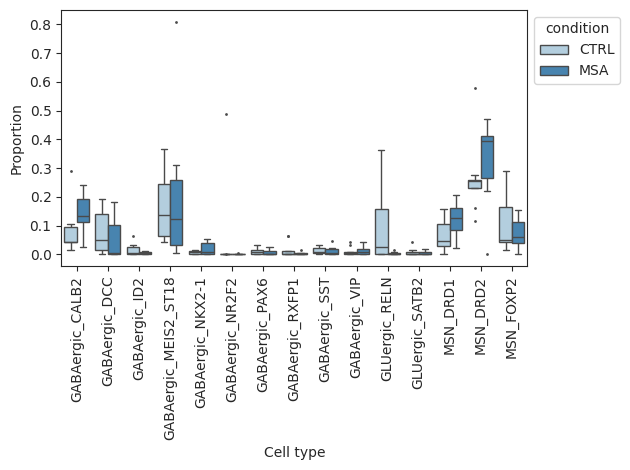

In [58]:
viz.boxplots(data_all, feature_name="condition")

In [ ]:
viz.rel_abundance_dispersion_plot

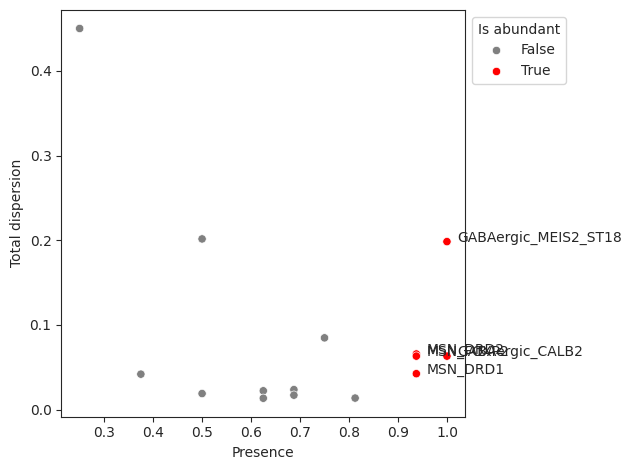

In [62]:
viz.rel_abundance_dispersion_plot(
    data=data_all,
    abundant_threshold=0.9,
    #figsize=[6, 20]
)
plt.show()

In [63]:
model = mod.CompositionalAnalysis(data_all, formula="condition", reference_cell_type="MSN_FOXP2")

Zero counts encountered in data! Added a pseudocount of 0.5.


In [64]:
sim_results = model.sample_hmc()

100%|██████████| 20000/20000 [03:50<00:00, 86.78it/s]


MCMC sampling finished. (291.664 sec)
Acceptance rate: 54.0%


In [136]:
sim_results.save("/work/02_data/scCODA/neurons_ctrl_msa")

### Load model

In [95]:
with open("/work/02_data/scCODA/neurons_ctrl_msa", "rb") as f:
    sim_results = pkl.load(f)

In [40]:
sim_results.summary()

Compositional Analysis summary:

Data: 16 samples, 15 cell types
Reference index: 14
Formula: condition

Intercepts:
                      Final Parameter  Expected Sample
Cell Type                                             
GABAergic_CALB2                 0.462        39.427875
GABAergic_DCC                   0.033        25.673852
GABAergic_ID2                  -0.739        11.863578
GABAergic_MEIS2_ST18            0.900        61.097628
GABAergic_NKX2-1               -0.659        12.851661
GABAergic_NR2F2                -1.138         7.960351
GABAergic_PAX6                 -0.898        10.119589
GABAergic_RXFP1                -0.943         9.674302
GABAergic_SST                  -0.642        13.072007
GABAergic_VIP                  -0.699        12.347740
GLUergic_RELN                  -0.224        19.855341
GLUergic_SATB2                 -0.843        10.691757
MSN_DRD1                        0.460        39.349098
MSN_DRD2                        1.575       119.997757
MSN

In [41]:
print(sim_results.credible_effects())

Covariate         Cell Type           
condition[T.MSA]  GABAergic_CALB2         False
                  GABAergic_DCC           False
                  GABAergic_ID2           False
                  GABAergic_MEIS2_ST18    False
                  GABAergic_NKX2-1        False
                  GABAergic_NR2F2         False
                  GABAergic_PAX6          False
                  GABAergic_RXFP1         False
                  GABAergic_SST           False
                  GABAergic_VIP           False
                  GLUergic_RELN           False
                  GLUergic_SATB2          False
                  MSN_DRD1                False
                  MSN_DRD2                False
                  MSN_FOXP2               False
Name: Final Parameter, dtype: bool


### Plot

In [96]:
sim_results.set_fdr(est_fdr=0.3)
sim_results.summary()

Compositional Analysis summary:

Data: 16 samples, 15 cell types
Reference index: 14
Formula: condition

Intercepts:
                      Final Parameter  Expected Sample
Cell Type                                             
GABAergic_CALB2                 0.462        39.427875
GABAergic_DCC                   0.033        25.673852
GABAergic_ID2                  -0.739        11.863578
GABAergic_MEIS2_ST18            0.900        61.097628
GABAergic_NKX2-1               -0.659        12.851661
GABAergic_NR2F2                -1.138         7.960351
GABAergic_PAX6                 -0.898        10.119589
GABAergic_RXFP1                -0.943         9.674302
GABAergic_SST                  -0.642        13.072007
GABAergic_VIP                  -0.699        12.347740
GLUergic_RELN                  -0.224        19.855341
GLUergic_SATB2                 -0.843        10.691757
MSN_DRD1                        0.460        39.349098
MSN_DRD2                        1.575       119.997757
MSN

In [97]:
print(sim_results.credible_effects())

Covariate         Cell Type           
condition[T.MSA]  GABAergic_CALB2         False
                  GABAergic_DCC           False
                  GABAergic_ID2           False
                  GABAergic_MEIS2_ST18    False
                  GABAergic_NKX2-1        False
                  GABAergic_NR2F2         False
                  GABAergic_PAX6          False
                  GABAergic_RXFP1         False
                  GABAergic_SST           False
                  GABAergic_VIP           False
                  GLUergic_RELN           False
                  GLUergic_SATB2          False
                  MSN_DRD1                False
                  MSN_DRD2                False
                  MSN_FOXP2               False
Name: Final Parameter, dtype: bool


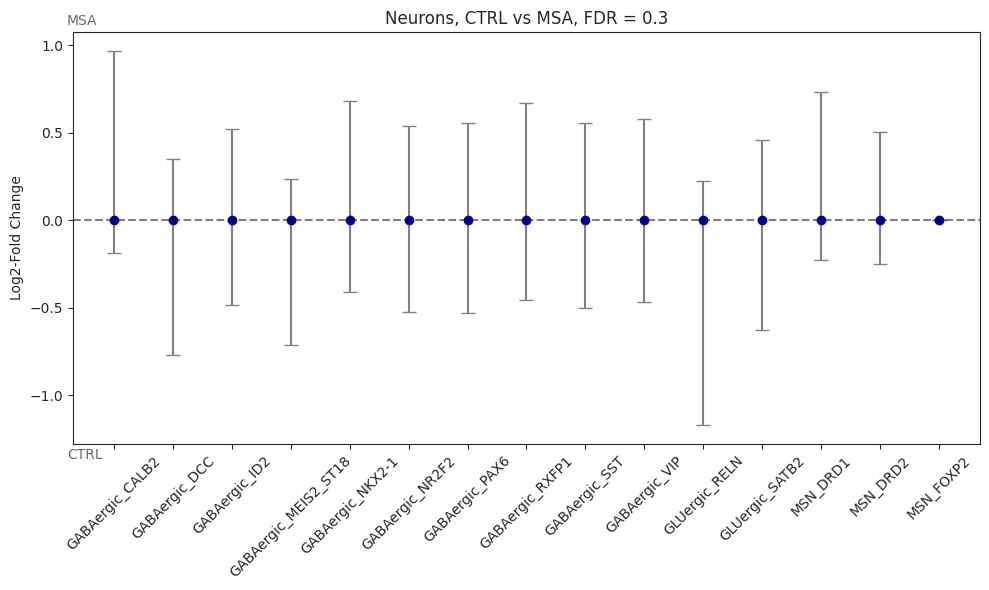

In [99]:
# Prepare DataFrame
df = sim_results.effect_df.reset_index()
df.rename(columns={"HDI 3%": "hdi_3", "HDI 97%": "hdi_97", "log2-fold change": "log2fc"}, inplace=True)

# Compute HDI errors
lower_err = (df["log2fc"] - df["hdi_3"]).abs()
upper_err = (df["hdi_97"] - df["log2fc"]).abs()

# Define highlight cells (optional)
highlight_cells = []  # customize as needed

plt.figure(figsize=(10, 6))
plt.errorbar(
    x=df["Cell Type"],
    y=df["log2fc"],
    yerr=[lower_err, upper_err],
    fmt='o',
    color='darkblue',
    ecolor='gray',
    capsize=5
)

# Horizontal reference line
plt.axhline(0, linestyle='--', color='black', alpha=0.5)

# Asterisks for selected cell types
for idx, row in df.iterrows():
    if row["Cell Type"] in highlight_cells:
        y_offset = upper_err[idx] + 0.01
        plt.text(
            x=idx,
            y=row["log2fc"] + y_offset,
            s="*",
            ha='center',
            va='bottom',
            fontsize=14,
            color='crimson'
        )

# Axis labels and ticks
plt.xticks(ticks=range(len(df["Cell Type"])), labels=df["Cell Type"], rotation=45)
plt.ylabel("Log2-Fold Change")
plt.xlabel("")

# Add overlay text near Y-axis to indicate condition direction
ylim = plt.ylim()
y_range = ylim[1] - ylim[0]
x_offset = -0.8  # nudges text outside the plot frame

plt.text(x=x_offset, y=ylim[1] + 0.01 * y_range, s="MSA", va='bottom', ha='left', fontsize=10, color='dimgray')
plt.text(x=x_offset, y=ylim[0] - 0.01 * y_range, s="CTRL", va='top', ha='left', fontsize=10, color='dimgray')

plt.title("Neurons, CTRL vs MSA, FDR = 0.3")
plt.tight_layout()
plt.show()


## CTRL vs PD

In [69]:
# Load data
cell_counts = pd.read_table("/work/02_data/other/sccoda_neurons_ctrl_pd.tsv", delimiter="\t")
cell_counts

,sample,GABAergic_CALB2,GABAergic_DCC,GABAergic_ID2,GABAergic_MEIS2_ST18,GABAergic_NKX2-1,GABAergic_PAX6,GABAergic_RXFP1,GABAergic_SST,GABAergic_VIP,GLUergic_RELN,GLUergic_SATB2,MSN_DRD1,MSN_DRD2,MSN_FOXP2,condition
0,CTRL_037,42,14,0,144,0,3,0,1,1,103,3,18,45,18,CTRL
1,CTRL_039,18,1,7,28,7,5,0,8,18,157,19,45,99,18,CTRL
2,CTRL_09051,17,75,1,95,5,0,5,2,2,10,1,12,101,65,CTRL
3,CTRL_09055,25,179,33,57,12,2,81,30,12,203,21,77,335,220,CTRL
4,CTRL_09057,3,6,1,2,0,1,2,1,1,0,0,0,5,9,CTRL
5,CTRL_09148,30,106,10,299,11,1,0,19,13,17,8,299,1267,109,CTRL
6,CTRL_10055,2,0,3,5,0,0,0,0,0,0,0,1,12,1,CTRL
7,CTRL_1467,20,1,0,12,1,2,0,2,0,0,0,11,19,1,CTRL
8,CTRL_652,13,34,1,95,2,4,0,1,2,14,0,8,67,32,CTRL
9,PD_6900,20,1,4,2,0,0,0,1,6,0,4,0,15,1,PD


In [70]:
# Convert data to anndata object
data_all = dat.from_pandas(cell_counts, covariate_columns=["sample", "condition"])
print(data_all)

AnnData object with n_obs × n_vars = 17 × 14
    obs: 'sample', 'condition'


<Axes: xlabel='Cell type', ylabel='Proportion'>

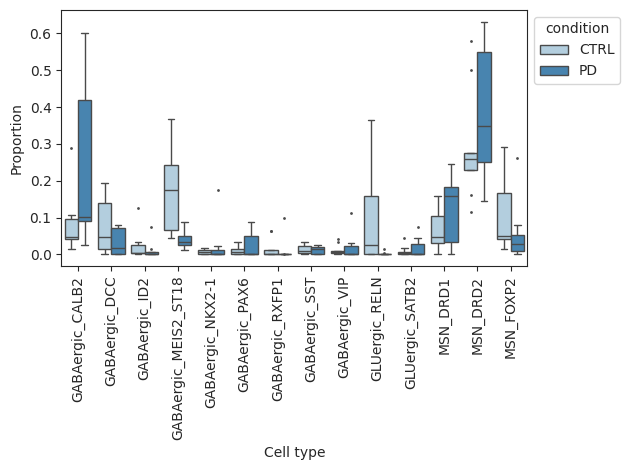

In [71]:
viz.boxplots(data_all, feature_name="condition")

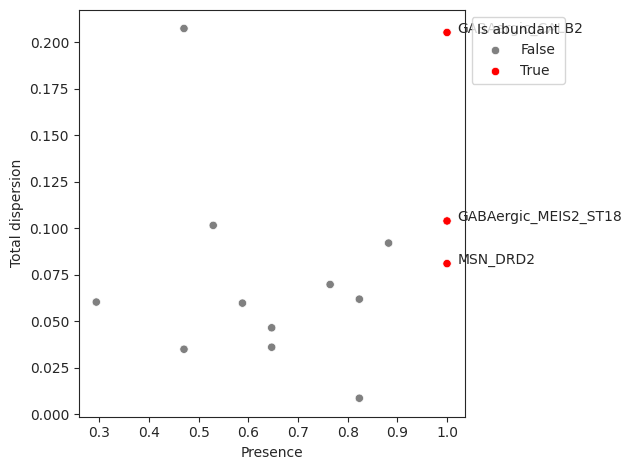

In [72]:
viz.rel_abundance_dispersion_plot(
    data=data_all,
    abundant_threshold=0.9
)
plt.show()

In [73]:
model = mod.CompositionalAnalysis(data_all, formula="condition", reference_cell_type="MSN_DRD2")

Zero counts encountered in data! Added a pseudocount of 0.5.


In [74]:
sim_results = model.sample_hmc()

100%|██████████| 20000/20000 [03:55<00:00, 84.98it/s]


MCMC sampling finished. (297.779 sec)
Acceptance rate: 56.7%


In [136]:
sim_results.save("/work/02_data/scCODA/neurons_ctrl_pd")

### Load model

In [100]:
with open("/work/02_data/scCODA/neurons_ctrl_pd", "rb") as f:
    sim_results = pkl.load(f)

In [47]:
sim_results.summary()

Compositional Analysis summary:

Data: 16 samples, 15 cell types
Reference index: 14
Formula: condition

Intercepts:
                      Final Parameter  Expected Sample
Cell Type                                             
GABAergic_CALB2                 0.456        39.149260
GABAergic_DCC                   0.033        25.645844
GABAergic_ID2                  -0.738        11.862493
GABAergic_MEIS2_ST18            0.908        61.521182
GABAergic_NKX2-1               -0.657        12.863342
GABAergic_NR2F2                -1.140         7.935779
GABAergic_PAX6                 -0.897        10.118663
GABAergic_RXFP1                -0.936         9.731631
GABAergic_SST                  -0.642        13.057746
GABAergic_VIP                  -0.705        12.260486
GLUergic_RELN                  -0.209        20.133428
GLUergic_SATB2                 -0.842        10.690778
MSN_DRD1                        0.458        39.227637
MSN_DRD2                        1.574       119.747042
MSN

In [48]:
print(sim_results.credible_effects())

Covariate         Cell Type           
condition[T.MSA]  GABAergic_CALB2         False
                  GABAergic_DCC           False
                  GABAergic_ID2           False
                  GABAergic_MEIS2_ST18    False
                  GABAergic_NKX2-1        False
                  GABAergic_NR2F2         False
                  GABAergic_PAX6          False
                  GABAergic_RXFP1         False
                  GABAergic_SST           False
                  GABAergic_VIP           False
                  GLUergic_RELN           False
                  GLUergic_SATB2          False
                  MSN_DRD1                False
                  MSN_DRD2                False
                  MSN_FOXP2               False
Name: Final Parameter, dtype: bool


### Plot

In [101]:
sim_results.set_fdr(est_fdr=0.3)
sim_results.summary()

Compositional Analysis summary:

Data: 16 samples, 15 cell types
Reference index: 14
Formula: condition

Intercepts:
                      Final Parameter  Expected Sample
Cell Type                                             
GABAergic_CALB2                 0.456        39.149260
GABAergic_DCC                   0.033        25.645844
GABAergic_ID2                  -0.738        11.862493
GABAergic_MEIS2_ST18            0.908        61.521182
GABAergic_NKX2-1               -0.657        12.863342
GABAergic_NR2F2                -1.140         7.935779
GABAergic_PAX6                 -0.897        10.118663
GABAergic_RXFP1                -0.936         9.731631
GABAergic_SST                  -0.642        13.057746
GABAergic_VIP                  -0.705        12.260486
GLUergic_RELN                  -0.209        20.133428
GLUergic_SATB2                 -0.842        10.690778
MSN_DRD1                        0.458        39.227637
MSN_DRD2                        1.574       119.747042
MSN

In [102]:
print(sim_results.credible_effects())

Covariate         Cell Type           
condition[T.MSA]  GABAergic_CALB2         False
                  GABAergic_DCC           False
                  GABAergic_ID2           False
                  GABAergic_MEIS2_ST18    False
                  GABAergic_NKX2-1        False
                  GABAergic_NR2F2         False
                  GABAergic_PAX6          False
                  GABAergic_RXFP1         False
                  GABAergic_SST           False
                  GABAergic_VIP           False
                  GLUergic_RELN           False
                  GLUergic_SATB2          False
                  MSN_DRD1                False
                  MSN_DRD2                False
                  MSN_FOXP2               False
Name: Final Parameter, dtype: bool


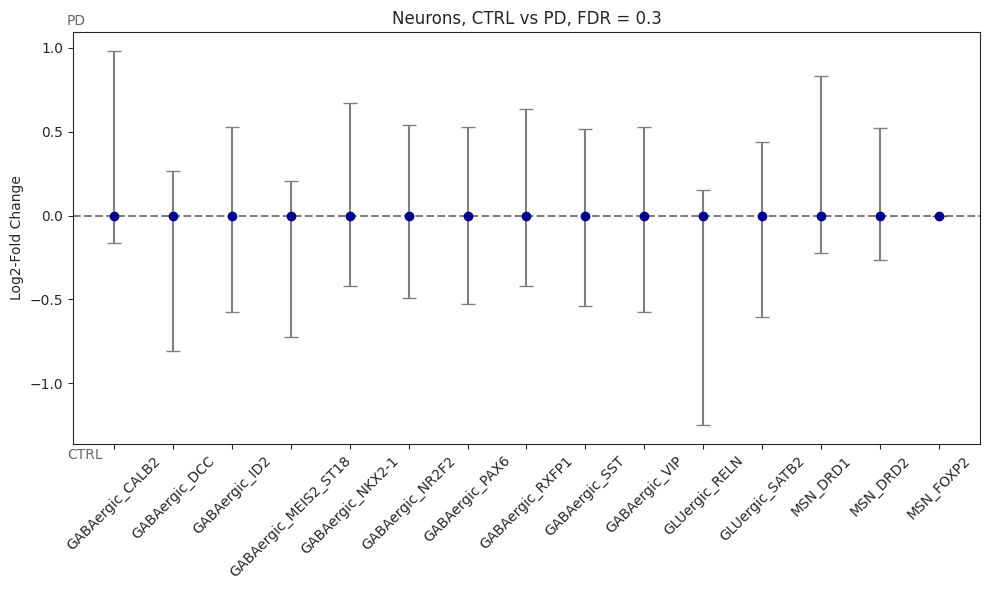

In [103]:
# Prepare DataFrame
df = sim_results.effect_df.reset_index()
df.rename(columns={"HDI 3%": "hdi_3", "HDI 97%": "hdi_97", "log2-fold change": "log2fc"}, inplace=True)

# Compute HDI errors
lower_err = (df["log2fc"] - df["hdi_3"]).abs()
upper_err = (df["hdi_97"] - df["log2fc"]).abs()

# Define highlight cells (optional)
highlight_cells = []  # customize as needed

plt.figure(figsize=(10, 6))
plt.errorbar(
    x=df["Cell Type"],
    y=df["log2fc"],
    yerr=[lower_err, upper_err],
    fmt='o',
    color='darkblue',
    ecolor='gray',
    capsize=5
)

# Horizontal reference line
plt.axhline(0, linestyle='--', color='black', alpha=0.5)

# Asterisks for selected cell types
for idx, row in df.iterrows():
    if row["Cell Type"] in highlight_cells:
        y_offset = upper_err[idx] + 0.01
        plt.text(
            x=idx,
            y=row["log2fc"] + y_offset,
            s="*",
            ha='center',
            va='bottom',
            fontsize=14,
            color='crimson'
        )

# Axis labels and ticks
plt.xticks(ticks=range(len(df["Cell Type"])), labels=df["Cell Type"], rotation=45)
plt.ylabel("Log2-Fold Change")
plt.xlabel("")

# Add overlay text near Y-axis to indicate condition direction
ylim = plt.ylim()
y_range = ylim[1] - ylim[0]
x_offset = -0.8  # nudges text outside the plot frame

plt.text(x=x_offset, y=ylim[1] + 0.01 * y_range, s="PD", va='bottom', ha='left', fontsize=10, color='dimgray')
plt.text(x=x_offset, y=ylim[0] - 0.01 * y_range, s="CTRL", va='top', ha='left', fontsize=10, color='dimgray')

plt.title("Neurons, CTRL vs PD, FDR = 0.3")
plt.tight_layout()
plt.show()


## PD vs MSA

In [2]:
# Load data
cell_counts = pd.read_table("/work/02_data/other/sccoda_neurons_pd_msa.tsv", delimiter="\t")
cell_counts

,sample,GABAergic_CALB2,GABAergic_DCC,GABAergic_ID2,GABAergic_MEIS2_ST18,GABAergic_NKX2-1,GABAergic_PAX6,GABAergic_RXFP1,GABAergic_SST,GABAergic_VIP,GLUergic_RELN,GLUergic_SATB2,MSN_DRD1,MSN_DRD2,MSN_FOXP2,condition
0,MSA_1352,52,97,3,166,0,0,3,3,0,5,0,12,117,74,MSA
1,MSA_1365,19,3,0,14,1,3,0,0,0,0,2,21,45,6,MSA
2,MSA_1371,1,0,0,34,0,0,0,2,1,0,0,3,0,1,MSA
3,MSA_1375,7,0,0,6,0,0,0,0,0,0,0,4,12,0,MSA
4,MSA_1391,42,1,2,5,10,3,0,1,3,3,2,24,78,17,MSA
5,MSA_1398,55,0,3,2,23,0,1,9,18,0,0,87,200,26,MSA
6,MSA_1436,64,84,5,19,14,3,8,6,4,0,2,47,150,74,MSA
7,PD_6900,20,1,4,2,0,0,0,1,6,0,4,0,15,1,PD
8,PD_7044,4,3,0,2,1,0,0,0,0,0,1,8,12,11,PD
9,PD_7050,5,0,0,3,0,3,5,1,1,0,0,8,21,4,PD


In [3]:
# Convert data to anndata object
data_all = dat.from_pandas(cell_counts, covariate_columns=["sample", "condition"])
print(data_all)

AnnData object with n_obs × n_vars = 15 × 14
    obs: 'sample', 'condition'


<Axes: xlabel='Cell type', ylabel='Proportion'>

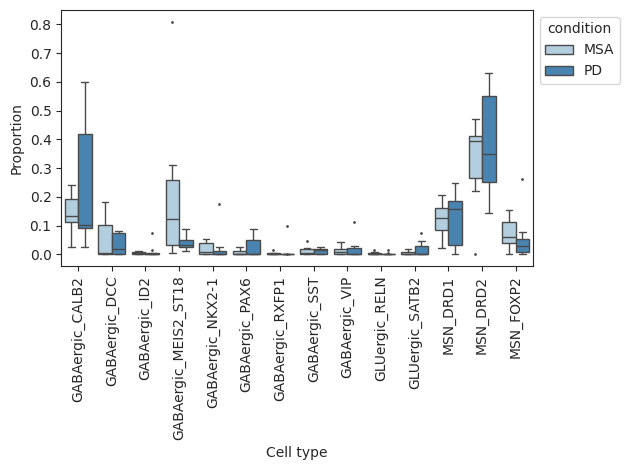

In [85]:
viz.boxplots(data_all, feature_name="condition")

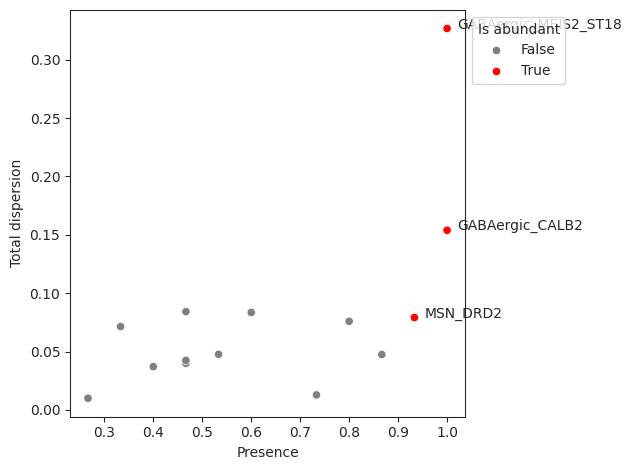

In [86]:
viz.rel_abundance_dispersion_plot(
    data=data_all,
    abundant_threshold=0.9
)
plt.show()

In [4]:
model = mod.CompositionalAnalysis(data_all, formula="condition", reference_cell_type="MSN_DRD2")

Zero counts encountered in data! Added a pseudocount of 0.5.


In [5]:
sim_results = model.sample_hmc()

100%|██████████| 20000/20000 [03:44<00:00, 88.95it/s]


MCMC sampling finished. (284.230 sec)
Acceptance rate: 51.6%


In [6]:
sim_results.save("/work/02_data/scCODA/neurons_pd_msa")

### Load model

In [104]:
with open("/work/02_data/scCODA/neurons_pd_msa", "rb") as f:
    sim_results = pkl.load(f)

In [57]:
sim_results.summary()

Compositional Analysis summary:

Data: 15 samples, 14 cell types
Reference index: 12
Formula: condition

Intercepts:
                      Final Parameter  Expected Sample
Cell Type                                             
GABAergic_CALB2                 1.101        33.922815
GABAergic_DCC                  -0.160         9.612726
GABAergic_ID2                  -0.687         5.675098
GABAergic_MEIS2_ST18            0.425        17.254756
GABAergic_NKX2-1               -0.453         7.171306
GABAergic_PAX6                 -0.670         5.772399
GABAergic_RXFP1                -0.768         5.233539
GABAergic_SST                  -0.594         6.228203
GABAergic_VIP                  -0.589         6.259422
GLUergic_RELN                  -0.835         4.894381
GLUergic_SATB2                 -0.776         5.191838
MSN_DRD1                        0.833        25.947825
MSN_DRD2                        1.865        72.827076
MSN_FOXP2                       0.314        15.441950


E

In [58]:
print(sim_results.credible_effects())

Covariate        Cell Type           
condition[T.PD]  GABAergic_CALB2         False
                 GABAergic_DCC           False
                 GABAergic_ID2           False
                 GABAergic_MEIS2_ST18    False
                 GABAergic_NKX2-1        False
                 GABAergic_PAX6          False
                 GABAergic_RXFP1         False
                 GABAergic_SST           False
                 GABAergic_VIP           False
                 GLUergic_RELN           False
                 GLUergic_SATB2          False
                 MSN_DRD1                False
                 MSN_DRD2                False
                 MSN_FOXP2               False
Name: Final Parameter, dtype: bool


### Plot

In [105]:
sim_results.set_fdr(est_fdr=0.3)
sim_results.summary()

Compositional Analysis summary:

Data: 15 samples, 14 cell types
Reference index: 12
Formula: condition

Intercepts:
                      Final Parameter  Expected Sample
Cell Type                                             
GABAergic_CALB2                 1.101        33.922815
GABAergic_DCC                  -0.160         9.612726
GABAergic_ID2                  -0.687         5.675098
GABAergic_MEIS2_ST18            0.425        17.254756
GABAergic_NKX2-1               -0.453         7.171306
GABAergic_PAX6                 -0.670         5.772399
GABAergic_RXFP1                -0.768         5.233539
GABAergic_SST                  -0.594         6.228203
GABAergic_VIP                  -0.589         6.259422
GLUergic_RELN                  -0.835         4.894381
GLUergic_SATB2                 -0.776         5.191838
MSN_DRD1                        0.833        25.947825
MSN_DRD2                        1.865        72.827076
MSN_FOXP2                       0.314        15.441950


E

In [106]:
print(sim_results.credible_effects())

Covariate        Cell Type           
condition[T.PD]  GABAergic_CALB2         False
                 GABAergic_DCC           False
                 GABAergic_ID2           False
                 GABAergic_MEIS2_ST18    False
                 GABAergic_NKX2-1        False
                 GABAergic_PAX6          False
                 GABAergic_RXFP1         False
                 GABAergic_SST           False
                 GABAergic_VIP           False
                 GLUergic_RELN           False
                 GLUergic_SATB2          False
                 MSN_DRD1                False
                 MSN_DRD2                False
                 MSN_FOXP2               False
Name: Final Parameter, dtype: bool


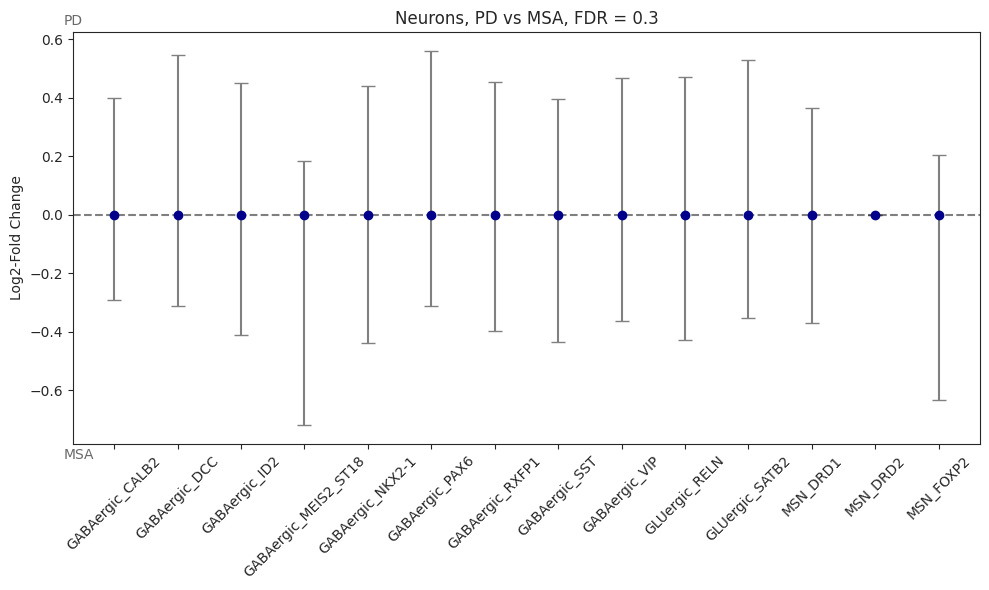

In [107]:
# Prepare DataFrame
df = sim_results.effect_df.reset_index()
df.rename(columns={"HDI 3%": "hdi_3", "HDI 97%": "hdi_97", "log2-fold change": "log2fc"}, inplace=True)

# Compute HDI errors
lower_err = (df["log2fc"] - df["hdi_3"]).abs()
upper_err = (df["hdi_97"] - df["log2fc"]).abs()

# Define highlight cells (optional)
highlight_cells = []  # customize as needed

plt.figure(figsize=(10, 6))
plt.errorbar(
    x=df["Cell Type"],
    y=df["log2fc"],
    yerr=[lower_err, upper_err],
    fmt='o',
    color='darkblue',
    ecolor='gray',
    capsize=5
)

# Horizontal reference line
plt.axhline(0, linestyle='--', color='black', alpha=0.5)

# Asterisks for selected cell types
for idx, row in df.iterrows():
    if row["Cell Type"] in highlight_cells:
        y_offset = upper_err[idx] + 0.01
        plt.text(
            x=idx,
            y=row["log2fc"] + y_offset,
            s="*",
            ha='center',
            va='bottom',
            fontsize=14,
            color='crimson'
        )

# Axis labels and ticks
plt.xticks(ticks=range(len(df["Cell Type"])), labels=df["Cell Type"], rotation=45)
plt.ylabel("Log2-Fold Change")
plt.xlabel("")

# Add overlay text near Y-axis to indicate condition direction
ylim = plt.ylim()
y_range = ylim[1] - ylim[0]
x_offset = -0.8  # nudges text outside the plot frame

plt.text(x=x_offset, y=ylim[1] + 0.01 * y_range, s="PD", va='bottom', ha='left', fontsize=10, color='dimgray')
plt.text(x=x_offset, y=ylim[0] - 0.01 * y_range, s="MSA", va='top', ha='left', fontsize=10, color='dimgray')

plt.title("Neurons, PD vs MSA, FDR = 0.3")
plt.tight_layout()
plt.show()


# Glia

## CTRL vs MSA

In [7]:
# Load data
cell_counts = pd.read_table("/work/02_data/other/sccoda_glia_ctrl_msa.tsv", delimiter="\t")
cell_counts

,sample,AS_reactive,AS_homeostatic,OL_LINC01608,OL_SLC5A11,OL_SGCZ,OPCs,COPs,condition
0,CTRL_037,308,798,4933,183,180,420,35,CTRL
1,CTRL_039,217,338,4279,1820,214,226,80,CTRL
2,CTRL_09051,174,43,4699,356,152,106,29,CTRL
3,CTRL_09055,203,192,3093,905,112,216,33,CTRL
4,CTRL_09057,121,30,1730,860,100,75,15,CTRL
5,CTRL_09148,206,538,3980,335,84,205,8,CTRL
6,CTRL_09155,91,16,1382,1067,122,104,15,CTRL
7,CTRL_10055,161,75,249,160,18,435,47,CTRL
8,CTRL_1467,177,174,2343,344,148,233,18,CTRL
9,CTRL_652,151,183,1730,410,132,246,16,CTRL


In [8]:
# Convert data to anndata object
data_all = dat.from_pandas(cell_counts, covariate_columns=["sample", "condition"])
print(data_all)

AnnData object with n_obs × n_vars = 17 × 7
    obs: 'sample', 'condition'


<Axes: xlabel='Cell type', ylabel='Proportion'>

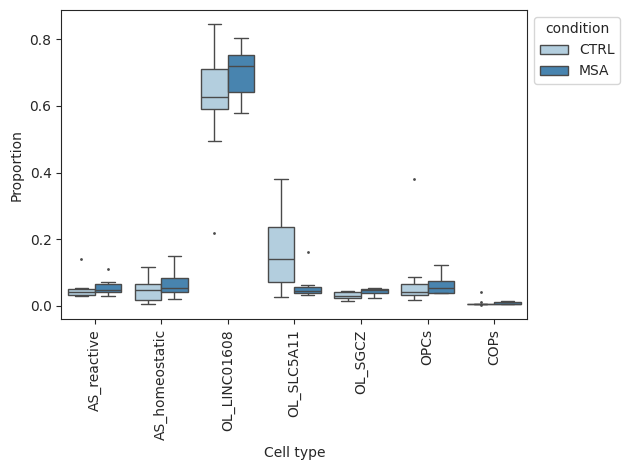

In [97]:
viz.boxplots(data_all, feature_name="condition")

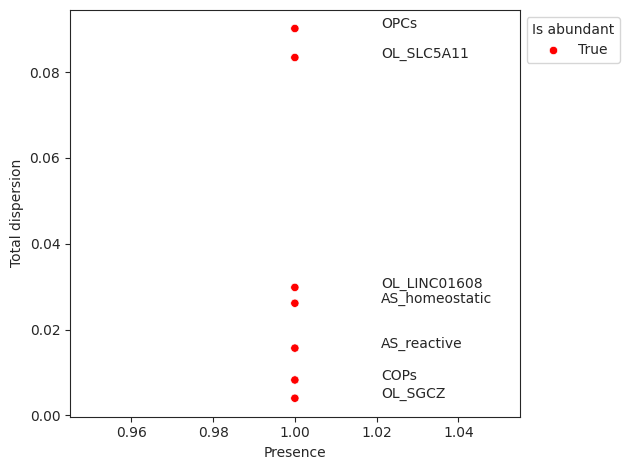

In [98]:
viz.rel_abundance_dispersion_plot(
    data=data_all,
    abundant_threshold=0.9
)
plt.show()

In [9]:
model = mod.CompositionalAnalysis(data_all, formula="condition", reference_cell_type="OL_SGCZ")

In [10]:
sim_results = model.sample_hmc()

100%|██████████| 20000/20000 [03:26<00:00, 96.66it/s] 


MCMC sampling finished. (261.167 sec)
Acceptance rate: 58.6%


In [11]:
sim_results.save("/work/02_data/scCODA/glia_ctrl_msa")

### Load model

In [108]:
with open("/work/02_data/scCODA/glia_ctrl_msa", "rb") as f:
    sim_results = pkl.load(f)

In [62]:
sim_results.summary()

Compositional Analysis summary:

Data: 17 samples, 7 cell types
Reference index: 4
Formula: condition

Intercepts:
                Final Parameter  Expected Sample
Cell Type                                       
AS_reactive               0.569       237.917994
AS_homeostatic            0.420       204.982796
OL_LINC01608              2.811      2239.316696
OL_SLC5A11                1.252       471.032009
OL_SGCZ                   0.342       189.601794
OPCs                      0.657       259.803624
COPs                     -0.595        74.286263


Effects:
                                 Final Parameter  Expected Sample  \
Covariate        Cell Type                                          
condition[T.MSA] AS_reactive                 0.0       237.917994   
                 AS_homeostatic              0.0       204.982796   
                 OL_LINC01608                0.0      2239.316696   
                 OL_SLC5A11                  0.0       471.032009   
                 OL

In [63]:
print(sim_results.credible_effects())

Covariate         Cell Type     
condition[T.MSA]  AS_reactive       False
                  AS_homeostatic    False
                  OL_LINC01608      False
                  OL_SLC5A11        False
                  OL_SGCZ           False
                  OPCs              False
                  COPs              False
Name: Final Parameter, dtype: bool


### Plot

In [109]:
sim_results.set_fdr(est_fdr=0.3)
sim_results.summary()

Compositional Analysis summary:

Data: 17 samples, 7 cell types
Reference index: 4
Formula: condition

Intercepts:
                Final Parameter  Expected Sample
Cell Type                                       
AS_reactive               0.569       237.917994
AS_homeostatic            0.420       204.982796
OL_LINC01608              2.811      2239.316696
OL_SLC5A11                1.252       471.032009
OL_SGCZ                   0.342       189.601794
OPCs                      0.657       259.803624
COPs                     -0.595        74.286263


Effects:
                                 Final Parameter  Expected Sample  \
Covariate        Cell Type                                          
condition[T.MSA] AS_reactive            0.000000       191.344872   
                 AS_homeostatic         0.000000       164.856832   
                 OL_LINC01608           0.392084      2665.537569   
                 OL_SLC5A11            -0.481652       234.024356   
                 OL

In [110]:
print(sim_results.credible_effects())

Covariate         Cell Type     
condition[T.MSA]  AS_reactive       False
                  AS_homeostatic    False
                  OL_LINC01608       True
                  OL_SLC5A11         True
                  OL_SGCZ           False
                  OPCs              False
                  COPs              False
Name: Final Parameter, dtype: bool


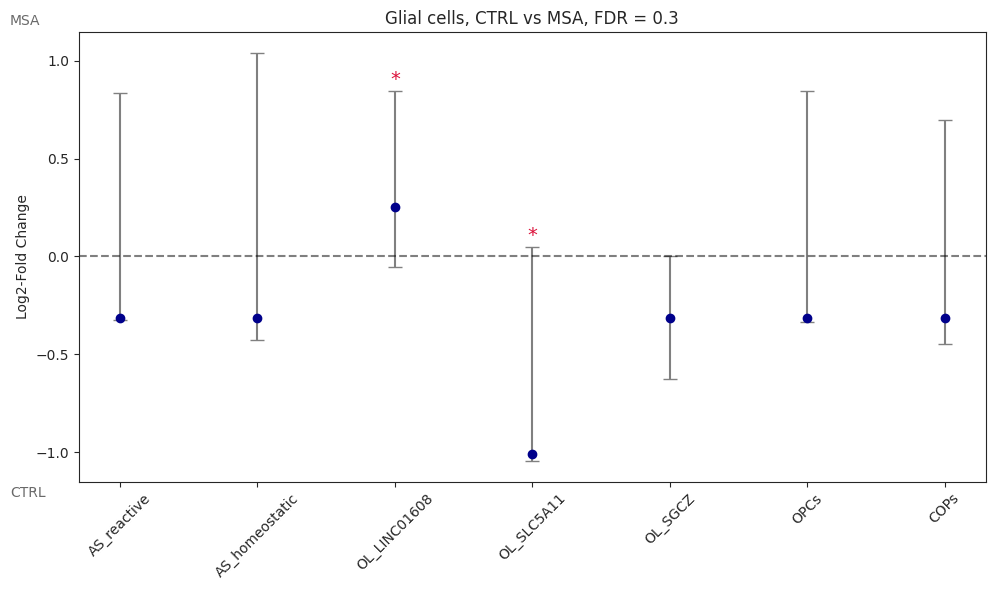

In [111]:
# Prepare DataFrame
df = sim_results.effect_df.reset_index()
df.rename(columns={"HDI 3%": "hdi_3", "HDI 97%": "hdi_97", "log2-fold change": "log2fc"}, inplace=True)

# Compute HDI errors
lower_err = (df["log2fc"] - df["hdi_3"]).abs()
upper_err = (df["hdi_97"] - df["log2fc"]).abs()

# Define highlight cells (optional)
highlight_cells = ["OL_LINC01608", "OL_SLC5A11"]  # customize as needed

plt.figure(figsize=(10, 6))
plt.errorbar(
    x=df["Cell Type"],
    y=df["log2fc"],
    yerr=[lower_err, upper_err],
    fmt='o',
    color='darkblue',
    ecolor='gray',
    capsize=5
)

# Horizontal reference line
plt.axhline(0, linestyle='--', color='black', alpha=0.5)

# Asterisks for selected cell types
for idx, row in df.iterrows():
    if row["Cell Type"] in highlight_cells:
        y_offset = upper_err[idx] + 0.01
        plt.text(
            x=idx,
            y=row["log2fc"] + y_offset,
            s="*",
            ha='center',
            va='bottom',
            fontsize=14,
            color='crimson'
        )

# Axis labels and ticks
plt.xticks(ticks=range(len(df["Cell Type"])), labels=df["Cell Type"], rotation=45)
plt.ylabel("Log2-Fold Change")
plt.xlabel("")

# Add overlay text near Y-axis to indicate condition direction
ylim = plt.ylim()
y_range = ylim[1] - ylim[0]
x_offset = -0.8  # nudges text outside the plot frame

plt.text(x=x_offset, y=ylim[1] + 0.01 * y_range, s="MSA", va='bottom', ha='left', fontsize=10, color='dimgray')
plt.text(x=x_offset, y=ylim[0] - 0.01 * y_range, s="CTRL", va='top', ha='left', fontsize=10, color='dimgray')

plt.title("Glial cells, CTRL vs MSA, FDR = 0.3")
plt.tight_layout()
plt.show()


## CTRL vs PD

In [12]:
# Load data
cell_counts = pd.read_table("/work/02_data/other/sccoda_glia_ctrl_pd.tsv", delimiter="\t")
cell_counts

,sample,AS_reactive,AS_homeostatic,OL_LINC01608,OL_SLC5A11,OL_SGCZ,OPCs,COPs,condition
0,CTRL_037,308,798,4933,183,180,420,35,CTRL
1,CTRL_039,217,338,4279,1820,214,226,80,CTRL
2,CTRL_09051,174,43,4699,356,152,106,29,CTRL
3,CTRL_09055,203,192,3093,905,112,216,33,CTRL
4,CTRL_09057,121,30,1730,860,100,75,15,CTRL
5,CTRL_09148,206,538,3980,335,84,205,8,CTRL
6,CTRL_09155,91,16,1382,1067,122,104,15,CTRL
7,CTRL_10055,161,75,249,160,18,435,47,CTRL
8,CTRL_1467,177,174,2343,344,148,233,18,CTRL
9,CTRL_652,151,183,1730,410,132,246,16,CTRL


In [13]:
# Convert data to anndata object
data_all = dat.from_pandas(cell_counts, covariate_columns=["sample", "condition"])
print(data_all)

AnnData object with n_obs × n_vars = 22 × 7
    obs: 'sample', 'condition'


<Axes: xlabel='Cell type', ylabel='Proportion'>

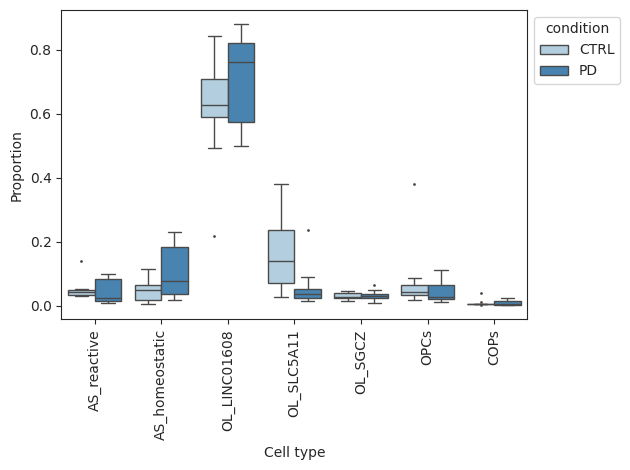

In [112]:
viz.boxplots(data_all, feature_name="condition")

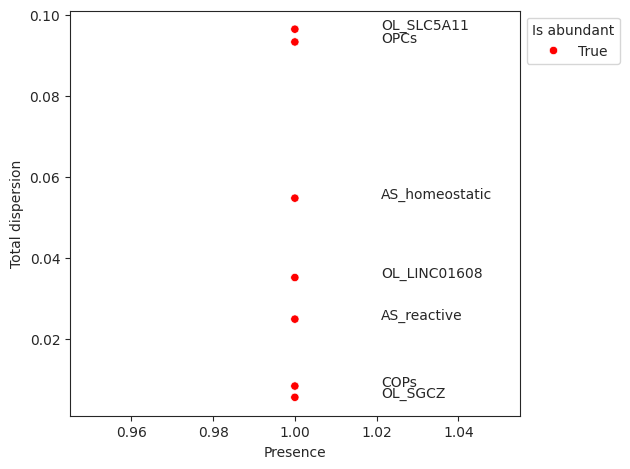

In [113]:
viz.rel_abundance_dispersion_plot(
    data=data_all,
    abundant_threshold=0.9
)
plt.show()

In [20]:
model = mod.CompositionalAnalysis(data_all, formula="condition", reference_cell_type="OL_SGCZ")

In [21]:
sim_results = model.sample_hmc()

100%|██████████| 20000/20000 [03:25<00:00, 97.54it/s] 


MCMC sampling finished. (258.622 sec)
Acceptance rate: 49.7%


In [22]:
sim_results.save("/work/02_data/scCODA/glia_ctrl_pd")

### Load model

In [112]:
with open("/work/02_data/scCODA/glia_ctrl_pd", "rb") as f:
    sim_results = pkl.load(f)

In [69]:
sim_results.summary()

Compositional Analysis summary:

Data: 22 samples, 7 cell types
Reference index: 4
Formula: condition

Intercepts:
                Final Parameter  Expected Sample
Cell Type                                       
AS_reactive               0.331       224.810797
AS_homeostatic            0.277       212.992967
OL_LINC01608              2.641      2264.839433
OL_SLC5A11                1.093       481.669958
OL_SGCZ                   0.110       180.234566
OPCs                      0.386       237.521737
COPs                     -0.669        82.703270


Effects:
                                Final Parameter  Expected Sample  \
Covariate       Cell Type                                          
condition[T.PD] AS_reactive                 0.0       224.810797   
                AS_homeostatic              0.0       212.992967   
                OL_LINC01608                0.0      2264.839433   
                OL_SLC5A11                  0.0       481.669958   
                OL_SGCZ  

In [70]:
print(sim_results.credible_effects())

Covariate        Cell Type     
condition[T.PD]  AS_reactive       False
                 AS_homeostatic    False
                 OL_LINC01608      False
                 OL_SLC5A11        False
                 OL_SGCZ           False
                 OPCs              False
                 COPs              False
Name: Final Parameter, dtype: bool


### Plot

In [113]:
sim_results.set_fdr(est_fdr=0.3)
sim_results.summary()

Compositional Analysis summary:

Data: 22 samples, 7 cell types
Reference index: 4
Formula: condition

Intercepts:
                Final Parameter  Expected Sample
Cell Type                                       
AS_reactive               0.331       224.810797
AS_homeostatic            0.277       212.992967
OL_LINC01608              2.641      2264.839433
OL_SLC5A11                1.093       481.669958
OL_SGCZ                   0.110       180.234566
OPCs                      0.386       237.521737
COPs                     -0.669        82.703270


Effects:
                                Final Parameter  Expected Sample  \
Covariate       Cell Type                                          
condition[T.PD] AS_reactive           -0.278868       134.140877   
                AS_homeostatic         0.555096       292.614032   
                OL_LINC01608           0.403826      2674.678250   
                OL_SLC5A11            -0.699711       188.679000   
                OL_SGCZ  

In [114]:
print(sim_results.credible_effects())

Covariate        Cell Type     
condition[T.PD]  AS_reactive        True
                 AS_homeostatic     True
                 OL_LINC01608       True
                 OL_SLC5A11         True
                 OL_SGCZ           False
                 OPCs              False
                 COPs              False
Name: Final Parameter, dtype: bool


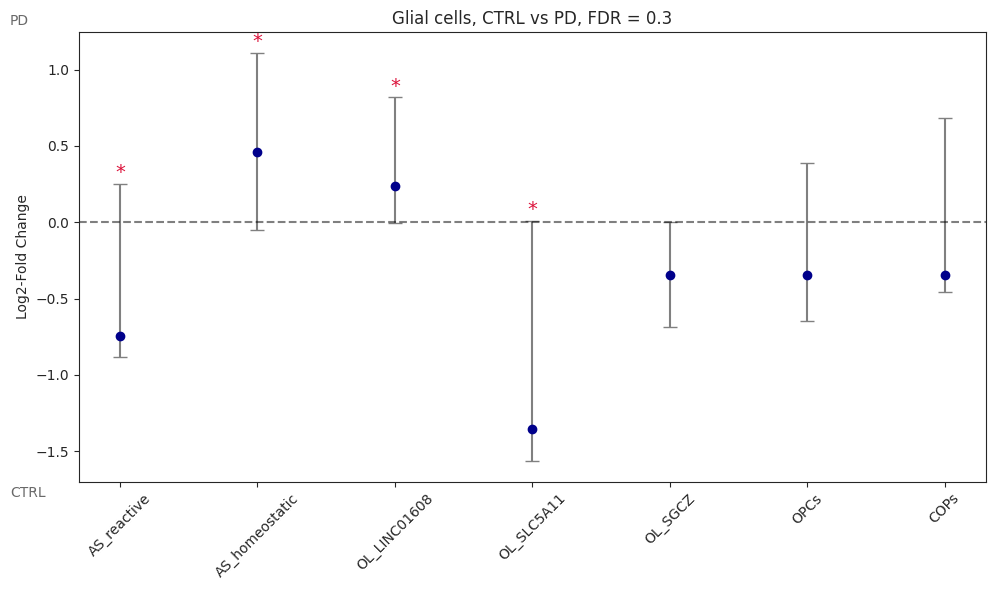

In [115]:
# Prepare DataFrame
df = sim_results.effect_df.reset_index()
df.rename(columns={"HDI 3%": "hdi_3", "HDI 97%": "hdi_97", "log2-fold change": "log2fc"}, inplace=True)

# Compute HDI errors
lower_err = (df["log2fc"] - df["hdi_3"]).abs()
upper_err = (df["hdi_97"] - df["log2fc"]).abs()

# Define highlight cells (optional)
highlight_cells = ["AS_reactive", "AS_homeostatic", "OL_LINC01608", "OL_SLC5A11"]  # customize as needed

plt.figure(figsize=(10, 6))
plt.errorbar(
    x=df["Cell Type"],
    y=df["log2fc"],
    yerr=[lower_err, upper_err],
    fmt='o',
    color='darkblue',
    ecolor='gray',
    capsize=5
)

# Horizontal reference line
plt.axhline(0, linestyle='--', color='black', alpha=0.5)

# Asterisks for selected cell types
for idx, row in df.iterrows():
    if row["Cell Type"] in highlight_cells:
        y_offset = upper_err[idx] + 0.01
        plt.text(
            x=idx,
            y=row["log2fc"] + y_offset,
            s="*",
            ha='center',
            va='bottom',
            fontsize=14,
            color='crimson'
        )

# Axis labels and ticks
plt.xticks(ticks=range(len(df["Cell Type"])), labels=df["Cell Type"], rotation=45)
plt.ylabel("Log2-Fold Change")
plt.xlabel("")

# Add overlay text near Y-axis to indicate condition direction
ylim = plt.ylim()
y_range = ylim[1] - ylim[0]
x_offset = -0.8  # nudges text outside the plot frame

plt.text(x=x_offset, y=ylim[1] + 0.01 * y_range, s="PD", va='bottom', ha='left', fontsize=10, color='dimgray')
plt.text(x=x_offset, y=ylim[0] - 0.01 * y_range, s="CTRL", va='top', ha='left', fontsize=10, color='dimgray')

plt.title("Glial cells, CTRL vs PD, FDR = 0.3")
plt.tight_layout()
plt.show()


## PD vs MSA

In [124]:
# Load data
cell_counts = pd.read_table("/work/02_data/other/sccoda_glia_pd_msa.tsv", delimiter="\t")
cell_counts

,sample,AS_reactive,AS_homeostatic,OL_LINC01608,OL_SLC5A11,OL_SGCZ,OPCs,COPs,condition
0,MSA_1352,97,170,1682,421,103,137,12,MSA
1,MSA_1365,88,113,2450,157,109,114,22,MSA
2,MSA_1371,126,45,1502,131,100,160,24,MSA
3,MSA_1375,101,208,813,56,34,172,19,MSA
4,MSA_1391,294,282,1712,120,139,109,19,MSA
5,MSA_1398,130,149,1966,100,133,198,37,MSA
6,MSA_1436,223,226,3972,167,273,193,22,MSA
7,PD_6900,383,705,2150,53,111,417,52,PD
8,PD_7044,181,409,1153,49,136,128,3,PD
9,PD_7050,48,132,2652,161,141,88,21,PD


In [125]:
# Convert data to anndata object
data_all = dat.from_pandas(cell_counts, covariate_columns=["sample", "condition"])
print(data_all)

AnnData object with n_obs × n_vars = 19 × 7
    obs: 'sample', 'condition'


<Axes: xlabel='Cell type', ylabel='Proportion'>

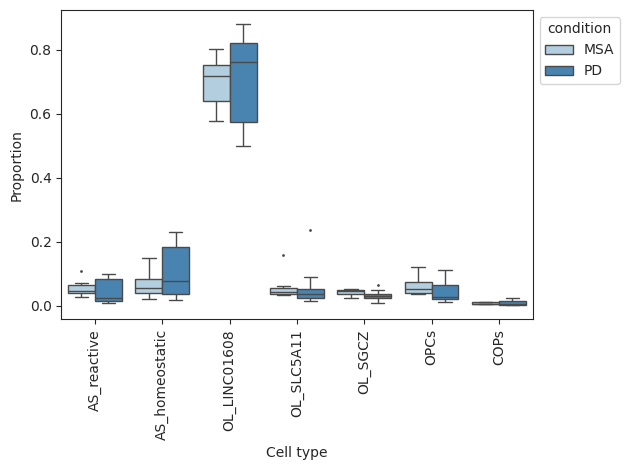

In [126]:
viz.boxplots(data_all, feature_name="condition")

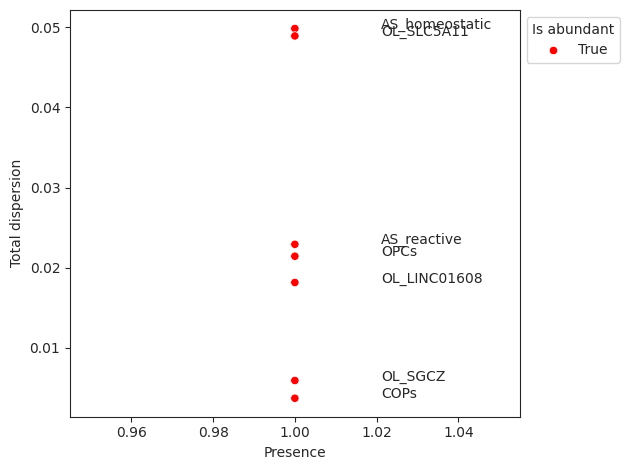

In [127]:
viz.rel_abundance_dispersion_plot(
    data=data_all,
    abundant_threshold=0.9
)
plt.show()

In [128]:
model = mod.CompositionalAnalysis(data_all, formula="condition", reference_cell_type="OL_SGCZ")

In [129]:
sim_results = model.sample_hmc()

100%|██████████| 20000/20000 [03:28<00:00, 95.73it/s]


MCMC sampling finished. (263.179 sec)
Acceptance rate: 58.0%


In [136]:
sim_results.save("/work/02_data/scCODA/glia_pd_msa")

### Load model

In [116]:
with open("/work/02_data/scCODA/glia_pd_msa", "rb") as f:
    sim_results = pkl.load(f)

In [78]:
sim_results.summary()

Compositional Analysis summary:

Data: 19 samples, 7 cell types
Reference index: 4
Formula: condition

Intercepts:
                Final Parameter  Expected Sample
Cell Type                                       
AS_reactive               0.642       153.488985
AS_homeostatic            1.029       226.021201
OL_LINC01608              3.274      2133.734062
OL_SLC5A11                0.764       173.404810
OL_SGCZ                   0.498       132.904231
OPCs                      0.747       170.481844
COPs                     -0.422        52.964867


Effects:
                                Final Parameter  Expected Sample  \
Covariate       Cell Type                                          
condition[T.PD] AS_reactive                 0.0       153.488985   
                AS_homeostatic              0.0       226.021201   
                OL_LINC01608                0.0      2133.734062   
                OL_SLC5A11                  0.0       173.404810   
                OL_SGCZ  

In [79]:
print(sim_results.credible_effects())

Covariate        Cell Type     
condition[T.PD]  AS_reactive       False
                 AS_homeostatic    False
                 OL_LINC01608      False
                 OL_SLC5A11        False
                 OL_SGCZ           False
                 OPCs              False
                 COPs              False
Name: Final Parameter, dtype: bool


### Plot

In [117]:
sim_results.set_fdr(est_fdr=0.3)
sim_results.summary()

Compositional Analysis summary:

Data: 19 samples, 7 cell types
Reference index: 4
Formula: condition

Intercepts:
                Final Parameter  Expected Sample
Cell Type                                       
AS_reactive               0.642       153.488985
AS_homeostatic            1.029       226.021201
OL_LINC01608              3.274      2133.734062
OL_SLC5A11                0.764       173.404810
OL_SGCZ                   0.498       132.904231
OPCs                      0.747       170.481844
COPs                     -0.422        52.964867


Effects:
                                Final Parameter  Expected Sample  \
Covariate       Cell Type                                          
condition[T.PD] AS_reactive                 0.0       153.488985   
                AS_homeostatic              0.0       226.021201   
                OL_LINC01608                0.0      2133.734062   
                OL_SLC5A11                  0.0       173.404810   
                OL_SGCZ  

In [118]:
print(sim_results.credible_effects())

Covariate        Cell Type     
condition[T.PD]  AS_reactive       False
                 AS_homeostatic    False
                 OL_LINC01608      False
                 OL_SLC5A11        False
                 OL_SGCZ           False
                 OPCs              False
                 COPs              False
Name: Final Parameter, dtype: bool


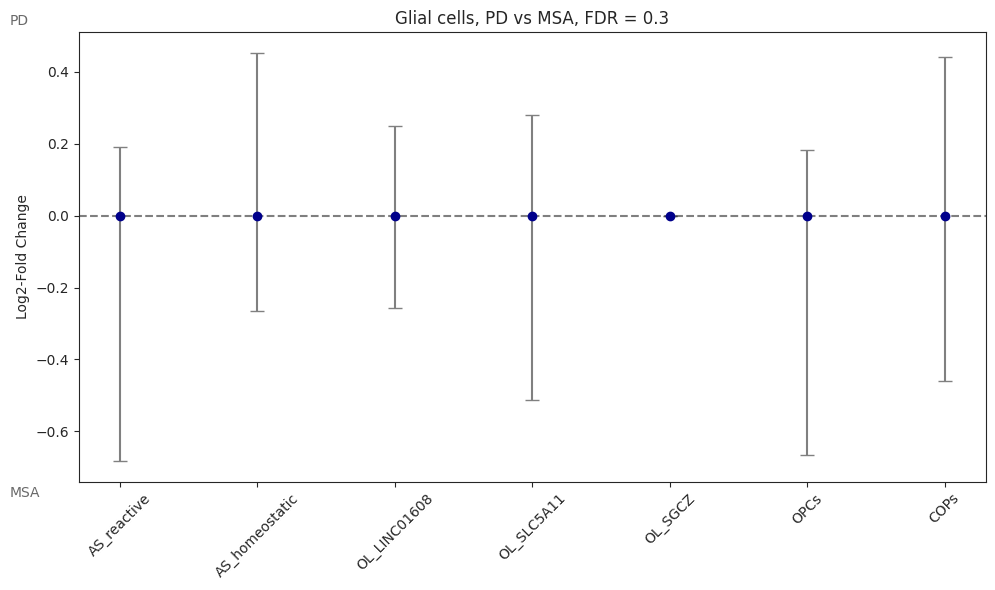

In [119]:
# Prepare DataFrame
df = sim_results.effect_df.reset_index()
df.rename(columns={"HDI 3%": "hdi_3", "HDI 97%": "hdi_97", "log2-fold change": "log2fc"}, inplace=True)

# Compute HDI errors
lower_err = (df["log2fc"] - df["hdi_3"]).abs()
upper_err = (df["hdi_97"] - df["log2fc"]).abs()

# Define highlight cells (optional)
highlight_cells = []  # customize as needed

plt.figure(figsize=(10, 6))
plt.errorbar(
    x=df["Cell Type"],
    y=df["log2fc"],
    yerr=[lower_err, upper_err],
    fmt='o',
    color='darkblue',
    ecolor='gray',
    capsize=5
)

# Horizontal reference line
plt.axhline(0, linestyle='--', color='black', alpha=0.5)

# Asterisks for selected cell types
for idx, row in df.iterrows():
    if row["Cell Type"] in highlight_cells:
        y_offset = upper_err[idx] + 0.01
        plt.text(
            x=idx,
            y=row["log2fc"] + y_offset,
            s="*",
            ha='center',
            va='bottom',
            fontsize=14,
            color='crimson'
        )

# Axis labels and ticks
plt.xticks(ticks=range(len(df["Cell Type"])), labels=df["Cell Type"], rotation=45)
plt.ylabel("Log2-Fold Change")
plt.xlabel("")

# Add overlay text near Y-axis to indicate condition direction
ylim = plt.ylim()
y_range = ylim[1] - ylim[0]
x_offset = -0.8  # nudges text outside the plot frame

plt.text(x=x_offset, y=ylim[1] + 0.01 * y_range, s="PD", va='bottom', ha='left', fontsize=10, color='dimgray')
plt.text(x=x_offset, y=ylim[0] - 0.01 * y_range, s="MSA", va='top', ha='left', fontsize=10, color='dimgray')

plt.title("Glial cells, PD vs MSA, FDR = 0.3")
plt.tight_layout()
plt.show()


# Microglia

## CTRL vs MSA

In [137]:
# Load data
cell_counts = pd.read_table("/work/02_data/other/sccoda_micro_ctrl_msa.tsv", delimiter="\t")
cell_counts

,sample,MIC_steady-state,MIC_intermediate1,MIC_intermediate2,MIC_activated,PVMs,condition
0,CTRL_037,244,60,102,32,18,CTRL
1,CTRL_039,118,68,58,49,38,CTRL
2,CTRL_09051,162,187,95,76,41,CTRL
3,CTRL_09055,172,329,165,99,84,CTRL
4,CTRL_09057,35,14,24,4,6,CTRL
5,CTRL_09148,110,148,106,44,77,CTRL
6,CTRL_09155,98,28,22,5,3,CTRL
7,CTRL_10055,24,1,3,3,1,CTRL
8,CTRL_1467,29,11,6,11,7,CTRL
9,CTRL_652,26,5,3,1,3,CTRL


In [138]:
# Convert data to anndata object
data_all = dat.from_pandas(cell_counts, covariate_columns=["sample", "condition"])
print(data_all)

AnnData object with n_obs × n_vars = 17 × 5
    obs: 'sample', 'condition'


<Axes: xlabel='Cell type', ylabel='Proportion'>

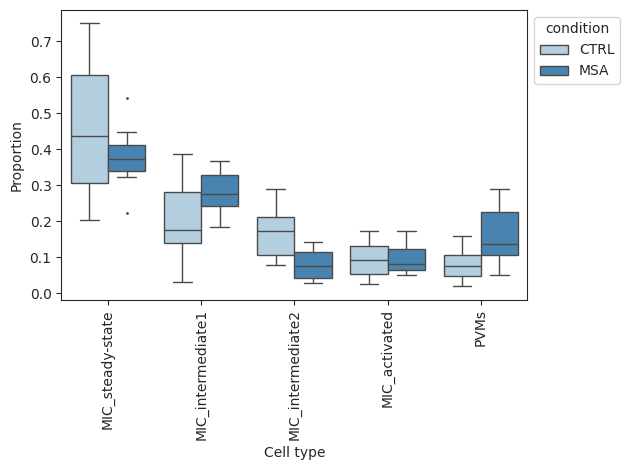

In [139]:
viz.boxplots(data_all, feature_name="condition")

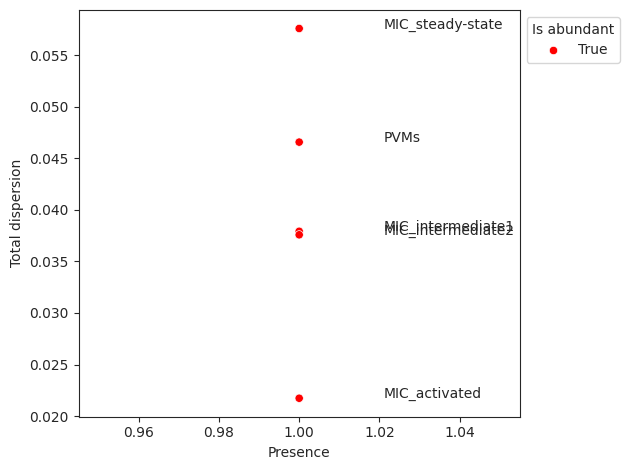

In [140]:
viz.rel_abundance_dispersion_plot(
    data=data_all,
    abundant_threshold=0.9
)
plt.show()

In [141]:
model = mod.CompositionalAnalysis(data_all, formula="condition", reference_cell_type="MIC_activated")

In [142]:
sim_results = model.sample_hmc()

100%|██████████| 20000/20000 [03:26<00:00, 96.70it/s] 


MCMC sampling finished. (261.444 sec)
Acceptance rate: 51.7%


In [146]:
sim_results.save("/work/02_data/scCODA/micro_ctrl_msa")

### Load model

In [120]:
with open("/work/02_data/scCODA/micro_ctrl_msa", "rb") as f:
    sim_results = pkl.load(f)

In [83]:
sim_results.summary()

Compositional Analysis summary:

Data: 17 samples, 5 cell types
Reference index: 3
Formula: condition

Intercepts:
                   Final Parameter  Expected Sample
Cell Type                                          
MIC_steady-state             2.303        95.234171
MIC_intermediate1            1.736        54.019161
MIC_intermediate2            1.384        37.990602
MIC_activated                0.947        24.540844
PVMs                         0.894        23.274046


Effects:
                                    Final Parameter  Expected Sample  \
Covariate        Cell Type                                             
condition[T.MSA] MIC_steady-state               0.0        95.234171   
                 MIC_intermediate1              0.0        54.019161   
                 MIC_intermediate2              0.0        37.990602   
                 MIC_activated                  0.0        24.540844   
                 PVMs                           0.0        23.274046   

     

In [84]:
print(sim_results.credible_effects())

Covariate         Cell Type        
condition[T.MSA]  MIC_steady-state     False
                  MIC_intermediate1    False
                  MIC_intermediate2    False
                  MIC_activated        False
                  PVMs                 False
Name: Final Parameter, dtype: bool


### Plot

In [121]:
sim_results.set_fdr(est_fdr=0.3)
sim_results.summary()

Compositional Analysis summary:

Data: 17 samples, 5 cell types
Reference index: 3
Formula: condition

Intercepts:
                   Final Parameter  Expected Sample
Cell Type                                          
MIC_steady-state             2.303        95.234171
MIC_intermediate1            1.736        54.019161
MIC_intermediate2            1.384        37.990602
MIC_activated                0.947        24.540844
PVMs                         0.894        23.274046


Effects:
                                    Final Parameter  Expected Sample  \
Covariate        Cell Type                                             
condition[T.MSA] MIC_steady-state          0.000000       101.572835   
                 MIC_intermediate1         0.000000        57.614607   
                 MIC_intermediate2        -0.487953        24.873995   
                 MIC_activated             0.000000        26.174251   
                 PVMs                      0.000000        24.823136   

     

In [122]:
print(sim_results.credible_effects())

Covariate         Cell Type        
condition[T.MSA]  MIC_steady-state     False
                  MIC_intermediate1    False
                  MIC_intermediate2     True
                  MIC_activated        False
                  PVMs                 False
Name: Final Parameter, dtype: bool


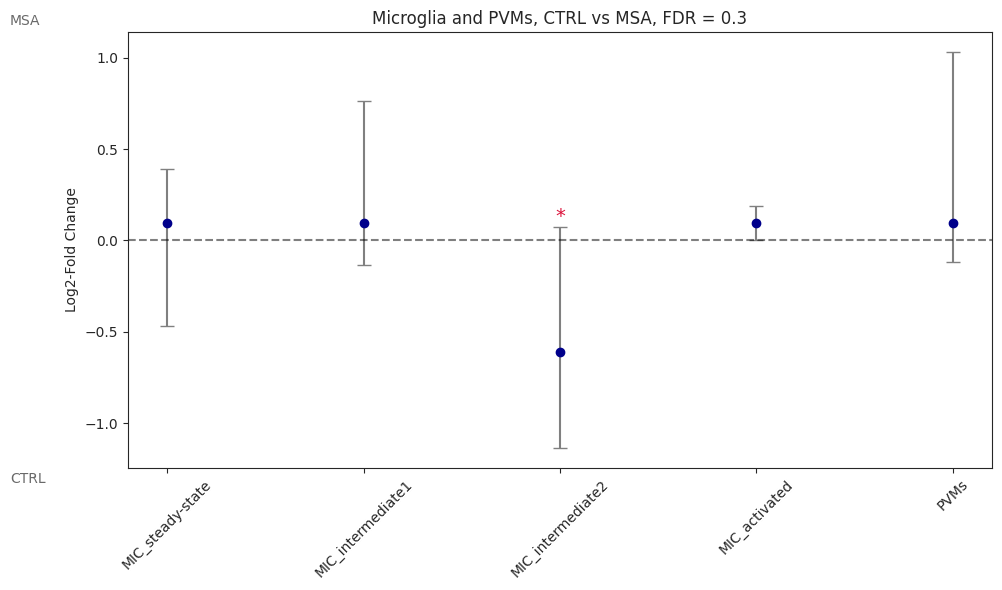

In [124]:
# Prepare DataFrame
df = sim_results.effect_df.reset_index()
df.rename(columns={"HDI 3%": "hdi_3", "HDI 97%": "hdi_97", "log2-fold change": "log2fc"}, inplace=True)

# Compute HDI errors
lower_err = (df["log2fc"] - df["hdi_3"]).abs()
upper_err = (df["hdi_97"] - df["log2fc"]).abs()

# Define highlight cells (optional)
highlight_cells = ["MIC_intermediate2"]  # customize as needed

plt.figure(figsize=(10, 6))
plt.errorbar(
    x=df["Cell Type"],
    y=df["log2fc"],
    yerr=[lower_err, upper_err],
    fmt='o',
    color='darkblue',
    ecolor='gray',
    capsize=5
)

# Horizontal reference line
plt.axhline(0, linestyle='--', color='black', alpha=0.5)

# Asterisks for selected cell types
for idx, row in df.iterrows():
    if row["Cell Type"] in highlight_cells:
        y_offset = upper_err[idx] + 0.01
        plt.text(
            x=idx,
            y=row["log2fc"] + y_offset,
            s="*",
            ha='center',
            va='bottom',
            fontsize=14,
            color='crimson'
        )

# Axis labels and ticks
plt.xticks(ticks=range(len(df["Cell Type"])), labels=df["Cell Type"], rotation=45)
plt.ylabel("Log2-Fold Change")
plt.xlabel("")

# Add overlay text near Y-axis to indicate condition direction
ylim = plt.ylim()
y_range = ylim[1] - ylim[0]
x_offset = -0.8  # nudges text outside the plot frame

plt.text(x=x_offset, y=ylim[1] + 0.01 * y_range, s="MSA", va='bottom', ha='left', fontsize=10, color='dimgray')
plt.text(x=x_offset, y=ylim[0] - 0.01 * y_range, s="CTRL", va='top', ha='left', fontsize=10, color='dimgray')

plt.title("Microglia and PVMs, CTRL vs MSA, FDR = 0.3")
plt.tight_layout()
plt.show()


## CTRL vs PD

In [152]:
# Load data
cell_counts = pd.read_table("/work/02_data/other/sccoda_micro_ctrl_pd.tsv", delimiter="\t")
cell_counts

,sample,MIC_steady-state,MIC_intermediate1,MIC_intermediate2,MIC_activated,PVMs,condition
0,CTRL_037,244,60,102,32,18,CTRL
1,CTRL_039,118,68,58,49,38,CTRL
2,CTRL_09051,162,187,95,76,41,CTRL
3,CTRL_09055,172,329,165,99,84,CTRL
4,CTRL_09057,35,14,24,4,6,CTRL
5,CTRL_09148,110,148,106,44,77,CTRL
6,CTRL_09155,98,28,22,5,3,CTRL
7,CTRL_10055,24,1,3,3,1,CTRL
8,CTRL_1467,29,11,6,11,7,CTRL
9,CTRL_652,26,5,3,1,3,CTRL


In [153]:
# Convert data to anndata object
data_all = dat.from_pandas(cell_counts, covariate_columns=["sample", "condition"])
print(data_all)

AnnData object with n_obs × n_vars = 22 × 5
    obs: 'sample', 'condition'


<Axes: xlabel='Cell type', ylabel='Proportion'>

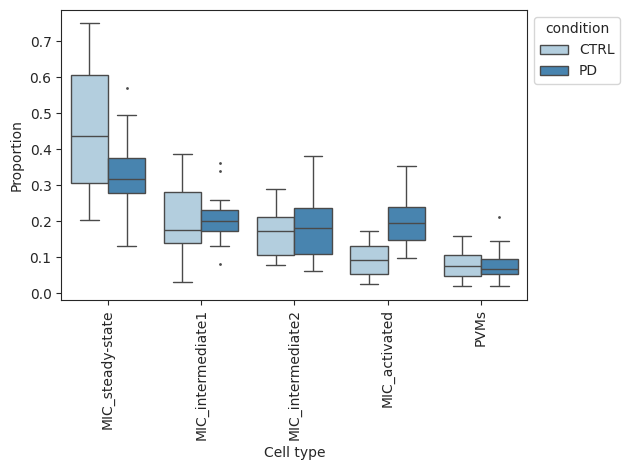

In [154]:
viz.boxplots(data_all, feature_name="condition")

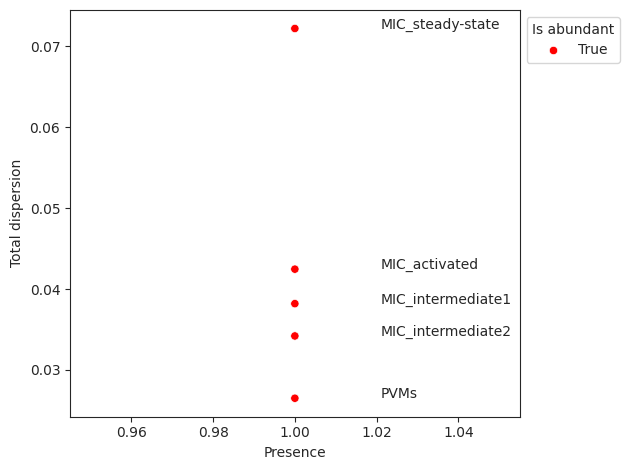

In [155]:
viz.rel_abundance_dispersion_plot(
    data=data_all,
    abundant_threshold=0.9
)
plt.show()

In [156]:
model = mod.CompositionalAnalysis(data_all, formula="condition", reference_cell_type="PVMs")

In [157]:
sim_results = model.sample_hmc()

100%|██████████| 20000/20000 [03:34<00:00, 93.42it/s]


MCMC sampling finished. (270.694 sec)
Acceptance rate: 53.2%


In [158]:
sim_results.save("/work/02_data/scCODA/micro_ctrl_pd")

### Load model

In [125]:
with open("/work/02_data/scCODA/micro_ctrl_pd", "rb") as f:
    sim_results = pkl.load(f)

In [88]:
sim_results.summary()

Compositional Analysis summary:

Data: 22 samples, 5 cell types
Reference index: 4
Formula: condition

Intercepts:
                   Final Parameter  Expected Sample
Cell Type                                          
MIC_steady-state             2.161       105.416847
MIC_intermediate1            1.578        58.845918
MIC_intermediate2            1.423        50.396537
MIC_activated                0.978        32.295324
PVMs                         0.731        25.227192


Effects:
                                   Final Parameter  Expected Sample  \
Covariate       Cell Type                                             
condition[T.PD] MIC_steady-state               0.0       105.416847   
                MIC_intermediate1              0.0        58.845918   
                MIC_intermediate2              0.0        50.396537   
                MIC_activated                  0.0        32.295324   
                PVMs                           0.0        25.227192   

            

In [89]:
print(sim_results.credible_effects())

Covariate        Cell Type        
condition[T.PD]  MIC_steady-state     False
                 MIC_intermediate1    False
                 MIC_intermediate2    False
                 MIC_activated        False
                 PVMs                 False
Name: Final Parameter, dtype: bool


### Plot

In [126]:
sim_results.set_fdr(est_fdr=0.3)
sim_results.summary()

Compositional Analysis summary:

Data: 22 samples, 5 cell types
Reference index: 4
Formula: condition

Intercepts:
                   Final Parameter  Expected Sample
Cell Type                                          
MIC_steady-state             2.161       105.416847
MIC_intermediate1            1.578        58.845918
MIC_intermediate2            1.423        50.396537
MIC_activated                0.978        32.295324
PVMs                         0.731        25.227192


Effects:
                                   Final Parameter  Expected Sample  \
Covariate       Cell Type                                             
condition[T.PD] MIC_steady-state          0.000000        97.179461   
                MIC_intermediate1         0.000000        54.247634   
                MIC_intermediate2         0.000000        46.458497   
                MIC_activated             0.539056        51.040315   
                PVMs                      0.000000        23.255912   

            

In [127]:
print(sim_results.credible_effects())

Covariate        Cell Type        
condition[T.PD]  MIC_steady-state     False
                 MIC_intermediate1    False
                 MIC_intermediate2    False
                 MIC_activated         True
                 PVMs                 False
Name: Final Parameter, dtype: bool


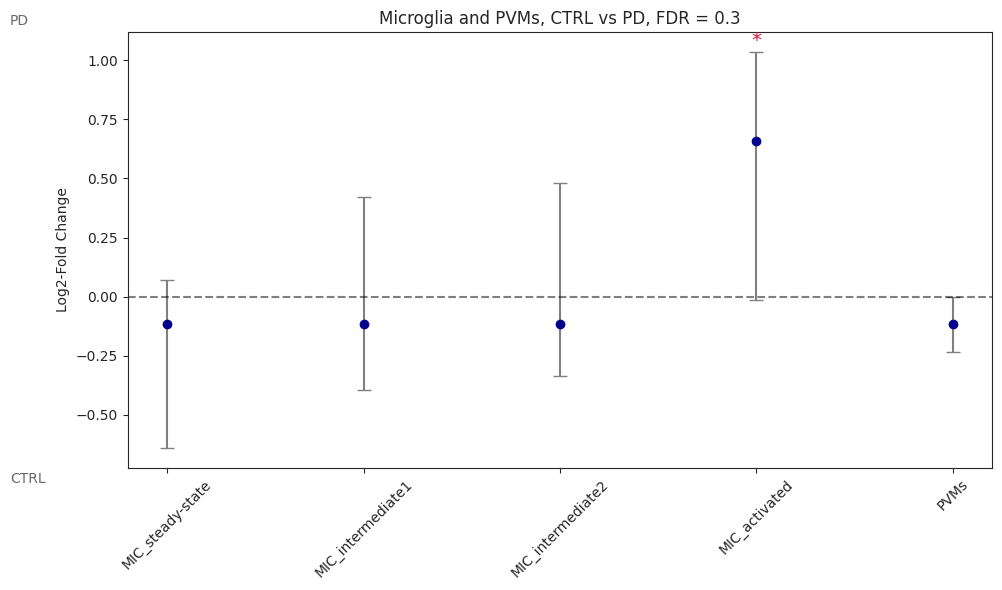

In [129]:
# Prepare DataFrame
df = sim_results.effect_df.reset_index()
df.rename(columns={"HDI 3%": "hdi_3", "HDI 97%": "hdi_97", "log2-fold change": "log2fc"}, inplace=True)

# Compute HDI errors
lower_err = (df["log2fc"] - df["hdi_3"]).abs()
upper_err = (df["hdi_97"] - df["log2fc"]).abs()

# Define highlight cells (optional)
highlight_cells = ["MIC_activated"]  # customize as needed

plt.figure(figsize=(10, 6))
plt.errorbar(
    x=df["Cell Type"],
    y=df["log2fc"],
    yerr=[lower_err, upper_err],
    fmt='o',
    color='darkblue',
    ecolor='gray',
    capsize=5
)

# Horizontal reference line
plt.axhline(0, linestyle='--', color='black', alpha=0.5)

# Asterisks for selected cell types
for idx, row in df.iterrows():
    if row["Cell Type"] in highlight_cells:
        y_offset = upper_err[idx] + 0.01
        plt.text(
            x=idx,
            y=row["log2fc"] + y_offset,
            s="*",
            ha='center',
            va='bottom',
            fontsize=14,
            color='crimson'
        )

# Axis labels and ticks
plt.xticks(ticks=range(len(df["Cell Type"])), labels=df["Cell Type"], rotation=45)
plt.ylabel("Log2-Fold Change")
plt.xlabel("")

# Add overlay text near Y-axis to indicate condition direction
ylim = plt.ylim()
y_range = ylim[1] - ylim[0]
x_offset = -0.8  # nudges text outside the plot frame

plt.text(x=x_offset, y=ylim[1] + 0.01 * y_range, s="PD", va='bottom', ha='left', fontsize=10, color='dimgray')
plt.text(x=x_offset, y=ylim[0] - 0.01 * y_range, s="CTRL", va='top', ha='left', fontsize=10, color='dimgray')

plt.title("Microglia and PVMs, CTRL vs PD, FDR = 0.3")
plt.tight_layout()
plt.show()


## PD vs MSA

In [168]:
# Load data
cell_counts = pd.read_table("/work/02_data/other/sccoda_micro_pd_msa.tsv", delimiter="\t")
cell_counts

,sample,MIC_steady-state,MIC_intermediate1,MIC_intermediate2,MIC_activated,PVMs,condition
0,MSA_1352,26,14,7,3,8,MSA
1,MSA_1365,58,43,12,23,20,MSA
2,MSA_1371,26,23,2,12,6,MSA
3,MSA_1375,10,9,1,2,6,MSA
4,MSA_1391,20,15,3,6,18,MSA
5,MSA_1398,145,49,38,22,14,MSA
6,MSA_1436,67,110,33,18,72,MSA
7,PD_6900,34,47,55,69,55,PD
8,PD_7044,146,182,269,71,38,PD
9,PD_7050,111,38,17,19,10,PD


In [169]:
# Convert data to anndata object
data_all = dat.from_pandas(cell_counts, covariate_columns=["sample", "condition"])
print(data_all)

AnnData object with n_obs × n_vars = 19 × 5
    obs: 'sample', 'condition'


<Axes: xlabel='Cell type', ylabel='Proportion'>

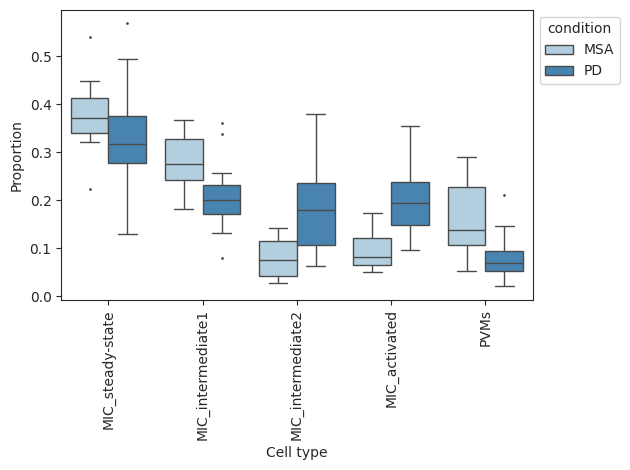

In [170]:
viz.boxplots(data_all, feature_name="condition")

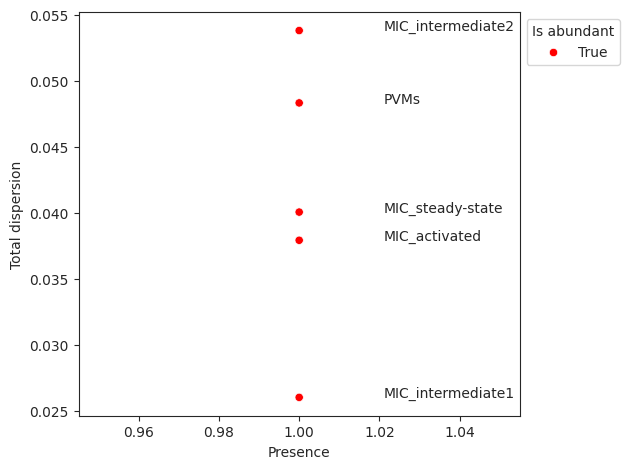

In [171]:
viz.rel_abundance_dispersion_plot(
    data=data_all,
    abundant_threshold=0.9
)
plt.show()

In [172]:
model = mod.CompositionalAnalysis(data_all, formula="condition", reference_cell_type="MIC_intermediate1")

In [173]:
sim_results = model.sample_hmc()

100%|██████████| 20000/20000 [03:28<00:00, 95.88it/s] 


MCMC sampling finished. (263.822 sec)
Acceptance rate: 59.3%


In [174]:
sim_results.save("/work/02_data/scCODA/micro_pd_msa")

### Load model

In [130]:
with open("/work/02_data/scCODA/micro_pd_msa", "rb") as f:
    sim_results = pkl.load(f)

In [93]:
sim_results.summary()

Compositional Analysis summary:

Data: 19 samples, 5 cell types
Reference index: 1
Formula: condition

Intercepts:
                   Final Parameter  Expected Sample
Cell Type                                          
MIC_steady-state             2.131        76.344241
MIC_intermediate1            1.768        53.104019
MIC_intermediate2            0.878        21.807471
MIC_activated                1.019        25.109659
PVMs                         1.111        27.529347


Effects:
                                   Final Parameter  Expected Sample  \
Covariate       Cell Type                                             
condition[T.PD] MIC_steady-state               0.0        76.344241   
                MIC_intermediate1              0.0        53.104019   
                MIC_intermediate2              0.0        21.807471   
                MIC_activated                  0.0        25.109659   
                PVMs                           0.0        27.529347   

            

In [94]:
print(sim_results.credible_effects())

Covariate        Cell Type        
condition[T.PD]  MIC_steady-state     False
                 MIC_intermediate1    False
                 MIC_intermediate2    False
                 MIC_activated        False
                 PVMs                 False
Name: Final Parameter, dtype: bool


### Plot

In [131]:
sim_results.set_fdr(est_fdr=0.3)
sim_results.summary()

Compositional Analysis summary:

Data: 19 samples, 5 cell types
Reference index: 1
Formula: condition

Intercepts:
                   Final Parameter  Expected Sample
Cell Type                                          
MIC_steady-state             2.131        76.344241
MIC_intermediate1            1.768        53.104019
MIC_intermediate2            0.878        21.807471
MIC_activated                1.019        25.109659
PVMs                         1.111        27.529347


Effects:
                                   Final Parameter  Expected Sample  \
Covariate       Cell Type                                             
condition[T.PD] MIC_steady-state          0.000000        64.504974   
                MIC_intermediate1         0.000000        44.868785   
                MIC_intermediate2         0.707980        37.401920   
                MIC_activated             0.637581        40.137990   
                PVMs                     -0.314643        16.981068   

            

In [132]:
print(sim_results.credible_effects())

Covariate        Cell Type        
condition[T.PD]  MIC_steady-state     False
                 MIC_intermediate1    False
                 MIC_intermediate2     True
                 MIC_activated         True
                 PVMs                  True
Name: Final Parameter, dtype: bool


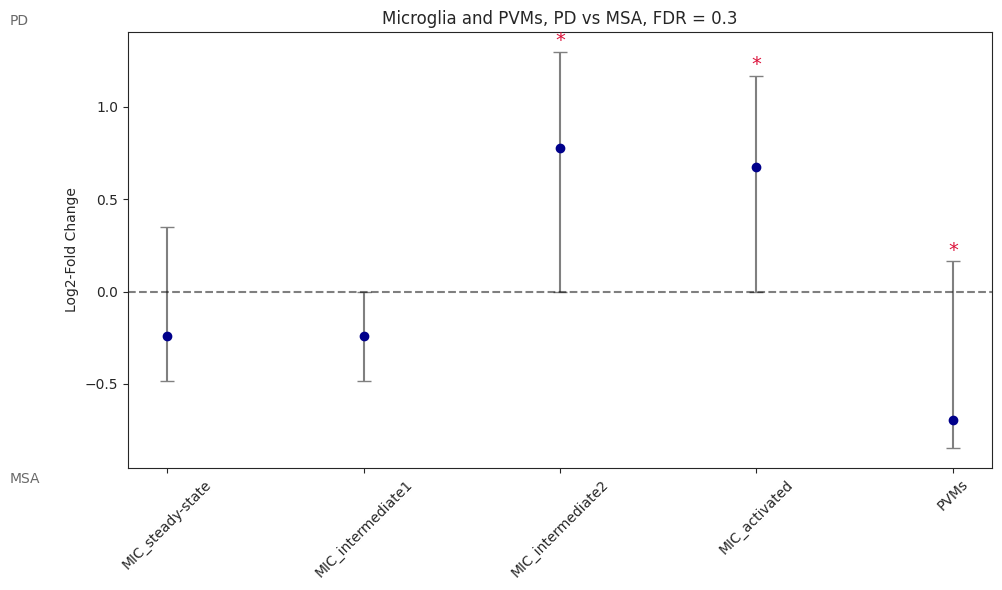

In [134]:
# Prepare DataFrame
df = sim_results.effect_df.reset_index()
df.rename(columns={"HDI 3%": "hdi_3", "HDI 97%": "hdi_97", "log2-fold change": "log2fc"}, inplace=True)

# Compute HDI errors
lower_err = (df["log2fc"] - df["hdi_3"]).abs()
upper_err = (df["hdi_97"] - df["log2fc"]).abs()

# Define highlight cells (optional)
highlight_cells = ["MIC_intermediate2", "MIC_activated", "PVMs"]  # customize as needed

plt.figure(figsize=(10, 6))
plt.errorbar(
    x=df["Cell Type"],
    y=df["log2fc"],
    yerr=[lower_err, upper_err],
    fmt='o',
    color='darkblue',
    ecolor='gray',
    capsize=5
)

# Horizontal reference line
plt.axhline(0, linestyle='--', color='black', alpha=0.5)

# Asterisks for selected cell types
for idx, row in df.iterrows():
    if row["Cell Type"] in highlight_cells:
        y_offset = upper_err[idx] + 0.01
        plt.text(
            x=idx,
            y=row["log2fc"] + y_offset,
            s="*",
            ha='center',
            va='bottom',
            fontsize=14,
            color='crimson'
        )

# Axis labels and ticks
plt.xticks(ticks=range(len(df["Cell Type"])), labels=df["Cell Type"], rotation=45)
plt.ylabel("Log2-Fold Change")
plt.xlabel("")

# Add overlay text near Y-axis to indicate condition direction
ylim = plt.ylim()
y_range = ylim[1] - ylim[0]
x_offset = -0.8  # nudges text outside the plot frame

plt.text(x=x_offset, y=ylim[1] + 0.01 * y_range, s="PD", va='bottom', ha='left', fontsize=10, color='dimgray')
plt.text(x=x_offset, y=ylim[0] - 0.01 * y_range, s="MSA", va='top', ha='left', fontsize=10, color='dimgray')

plt.title("Microglia and PVMs, PD vs MSA, FDR = 0.3")
plt.tight_layout()
plt.show()
